In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

from google.colab import files
uploaded = files.upload()

data= pd.read_csv('bank_additional_full (1).csv')

# Step 1: Dropping the day_of_week column
data=data.drop(['day_of_week'], axis=1)

# Step 2: Converting 'month' column into four quarters and creating dummy variables
month_to_quarter = {
    'jan': 'Q1', 'feb': 'Q1', 'mar': 'Q1',
    'apr': 'Q2', 'may': 'Q2', 'jun': 'Q2',
    'jul': 'Q3', 'aug': 'Q3', 'sep': 'Q3',
    'oct': 'Q4', 'nov': 'Q4', 'dec': 'Q4'
}
data['quarter'] = data['month'].map(month_to_quarter)

# Step 3: Converting 'education' into three categories (high education, moderate, illiterate)
education_map = {
    'illiterate': 'no_education',
    'basic.4y': 'basic', 'basic.6y': 'basic', 'basic.9y': 'moderate',
    'high.school': 'moderate', 'professional.course': 'high',
    'university.degree': 'high', 'unknown': 'no_education'
}
data['education_level'] = data['education'].map(education_map)

# Step 4: Converting 'job' into three categories (high income, moderate income, low_income)
job_map = {
    'admin.': 'high_income', 'entrepreneur': 'high_income', 'management': 'high_income',
    'self-employed': 'moderate_income', 'blue-collar': 'low_income', 'services': 'moderate_income',
    'technician': 'low_income', 'unknown': 'low_income', 'housemaid': 'low_income',
    'student': 'low_income', 'retired': 'low_income', 'unemployed': 'low_income'
}
data['job_category'] = data['job'].map(job_map)

# Dropping original columns that have been converted
data.drop(columns=['month', 'education', 'job'], inplace=True)

# Display the first few rows of the cleaned data
data.head()

# Ensure data is a Pandas DataFrame
if not isinstance(data, pd.DataFrame):
    data = pd.DataFrame(data)

data['loan'] = pd.Categorical(data['loan'], categories=['unknown', 'yes', 'no'], ordered=True)
data['marital'] = pd.Categorical(data['marital'], categories=['unknown', 'married', 'single', 'divorced'], ordered=True)
data['housing'] = pd.Categorical(data['housing'], categories=['unknown', 'yes', 'no'], ordered=True)

categorical_columns = [
    'marital', 'default', 'housing',
    'loan', 'contact', 'poutcome', 'job_category', 'education_level', 'quarter'
]

data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

data_encoded = data_encoded.replace({'yes': 1, 'no': 0})

print(data_encoded.head())

Saving bank_additional_full (1).csv to bank_additional_full (1).csv
   age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56       261         1    999         0           1.1          93.994   
1   57       149         1    999         0           1.1          93.994   
2   37       226         1    999         0           1.1          93.994   
3   40       151         1    999         0           1.1          93.994   
4   56       307         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  ...  poutcome_nonexistent  \
0          -36.4      4.857       5191.0  ...                  True   
1          -36.4      4.857       5191.0  ...                  True   
2          -36.4      4.857       5191.0  ...                  True   
3          -36.4      4.857       5191.0  ...                  True   
4          -36.4      4.857       5191.0  ...                  True   

   poutcome_success  job_category_low_inco

<ipython-input-1-0c0e92ba4809>:62: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_encoded = data_encoded.replace({'yes': 1, 'no': 0})


In [ ]:
boolean_columns = data_encoded.select_dtypes(include='bool').columns

data_encoded[boolean_columns] = data_encoded[boolean_columns].astype(int)

print(data_encoded.dtypes)
print(data_encoded.head())

age                               int64
duration                          int64
campaign                          int64
pdays                             int64
previous                          int64
emp.var.rate                    float64
cons.price.idx                  float64
cons.conf.idx                   float64
euribor3m                       float64
nr.employed                     float64
y                                 int64
marital_married                   int64
marital_single                    int64
marital_divorced                  int64
default_unknown                   int64
default_yes                       int64
housing_yes                       int64
housing_no                        int64
loan_yes                          int64
loan_no                           int64
contact_telephone                 int64
poutcome_nonexistent              int64
poutcome_success                  int64
job_category_low_income           int64
job_category_moderate_income      int64


In [ ]:
data_encoded.isna().sum()

,0
age,0
duration,0
campaign,0
pdays,0
previous,0
emp.var.rate,0
cons.price.idx,0
cons.conf.idx,0
euribor3m,0
nr.employed,0


In [ ]:
data_encoded.shape

(41188, 31)

In [ ]:
data_encoded.shape[1]

31

In [ ]:
for i in range(data_encoded.shape[1]):
  print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


In [ ]:
for i in range(data_encoded.shape[1]):
  print(data_encoded.iloc[:,i].unique())
  print(data_encoded.iloc[:,i].value_counts())

[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
age
31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
94       1
87       1
95       1
Name: count, Length: 78, dtype: int64
[ 261  149  226 ... 1246 1556 1868]
duration
90      170
85      170
136     168
73      167
124     164
       ... 
1569      1
1053      1
1263      1
1169      1
1868      1
Name: count, Length: 1544, dtype: int64
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37 40 33 34 43]
campaign
1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
16       51
15       51
18       33
20       30
19       26
21 

In [ ]:
data_encoded.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,poutcome_nonexistent,poutcome_success,job_category_low_income,job_category_moderate_income,education_level_high,education_level_moderate,education_level_no_education,quarter_Q2,quarter_Q3,quarter_Q4
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,...,0.863431,0.033335,0.509760,0.130863,0.422720,0.377780,0.042464,0.527314,0.338011,0.121419
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,...,0.343396,0.179512,0.499911,0.337255,0.493998,0.484838,0.201647,0.499259,0.473038,0.326617
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,...,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X=data_encoded.drop(['y'],axis=1)

print(X)
y = data['y']
print(y)

       age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0       56       261         1    999         0           1.1          93.994   
1       57       149         1    999         0           1.1          93.994   
2       37       226         1    999         0           1.1          93.994   
3       40       151         1    999         0           1.1          93.994   
4       56       307         1    999         0           1.1          93.994   
...    ...       ...       ...    ...       ...           ...             ...   
41183   73       334         1    999         0          -1.1          94.767   
41184   46       383         1    999         0          -1.1          94.767   
41185   56       189         2    999         0          -1.1          94.767   
41186   44       442         1    999         0          -1.1          94.767   
41187   74       239         3    999         1          -1.1          94.767   

       cons.conf.idx  eurib

In [ ]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           41188 non-null  int64  
 1   duration                      41188 non-null  int64  
 2   campaign                      41188 non-null  int64  
 3   pdays                         41188 non-null  int64  
 4   previous                      41188 non-null  int64  
 5   emp.var.rate                  41188 non-null  float64
 6   cons.price.idx                41188 non-null  float64
 7   cons.conf.idx                 41188 non-null  float64
 8   euribor3m                     41188 non-null  float64
 9   nr.employed                   41188 non-null  float64
 10  y                             41188 non-null  int64  
 11  marital_married               41188 non-null  int64  
 12  marital_single                41188 non-null  int64  
 13  m

In [ ]:
print(data_encoded)

       age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0       56       261         1    999         0           1.1          93.994   
1       57       149         1    999         0           1.1          93.994   
2       37       226         1    999         0           1.1          93.994   
3       40       151         1    999         0           1.1          93.994   
4       56       307         1    999         0           1.1          93.994   
...    ...       ...       ...    ...       ...           ...             ...   
41183   73       334         1    999         0          -1.1          94.767   
41184   46       383         1    999         0          -1.1          94.767   
41185   56       189         2    999         0          -1.1          94.767   
41186   44       442         1    999         0          -1.1          94.767   
41187   74       239         3    999         1          -1.1          94.767   

       cons.conf.idx  eurib

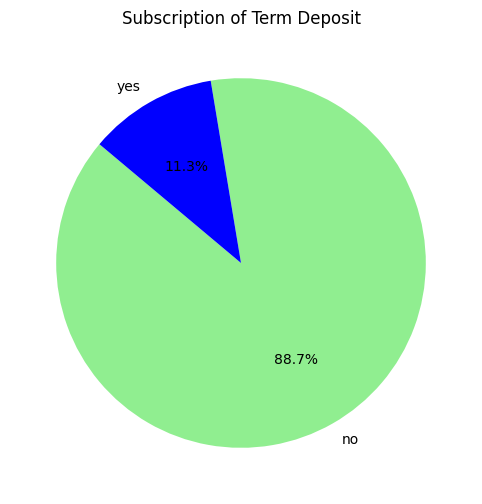

In [ ]:
counts=data['y'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=['lightgreen','blue'])
plt.title('Subscription of Term Deposit')
plt.show()

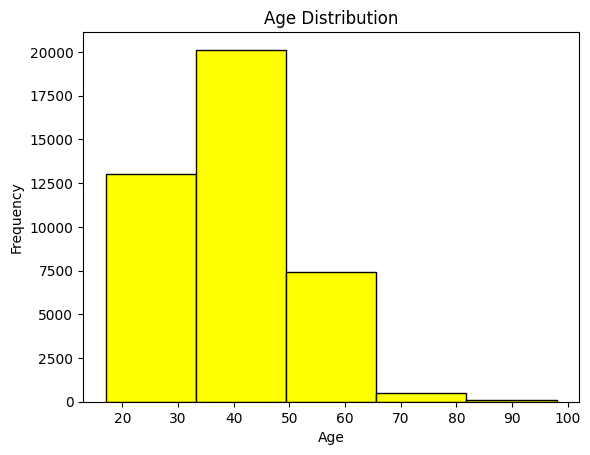

In [ ]:
Age = data_encoded['age']

plt.hist(Age, bins=5, edgecolor='black',color='yellow')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

plt.show()

<ipython-input-14-9af369f0225e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y, palette='viridis')


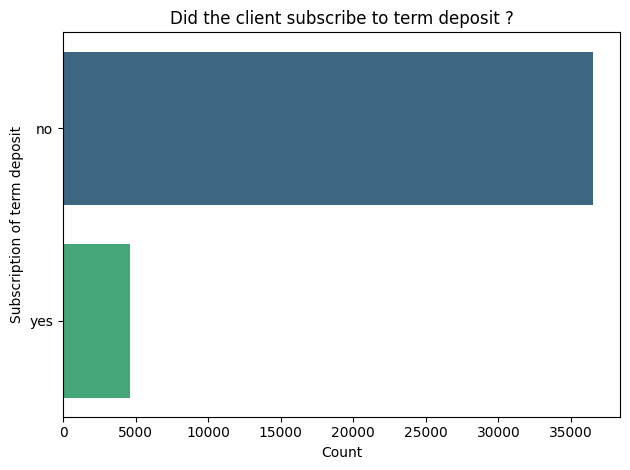

In [ ]:
z = data_encoded['y']

sns.countplot(y, palette='viridis')

plt.xlabel('Count')
plt.ylabel('Subscription of term deposit')
plt.title('Did the client subscribe to term deposit ?')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

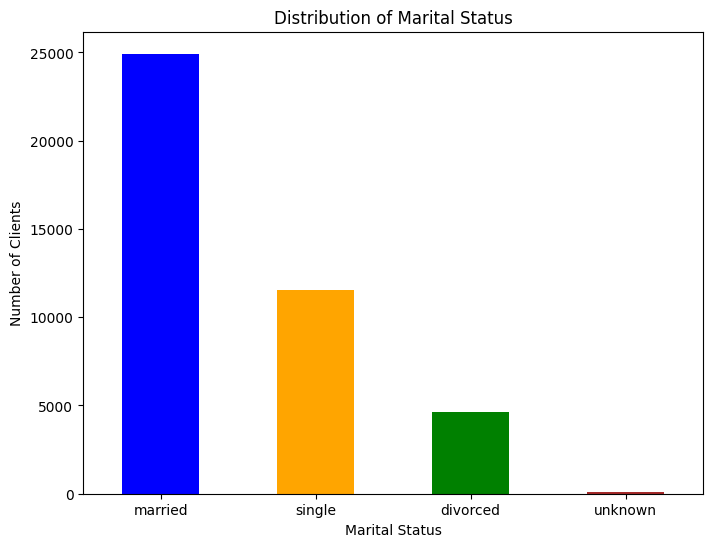

In [ ]:
marital_counts=data['marital'].value_counts()
plt.figure(figsize=(8,6))
marital_counts.plot(kind='bar',color=['blue','orange','green','brown'])
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Number of Clients')
plt.xticks(rotation=0)
plt.show()

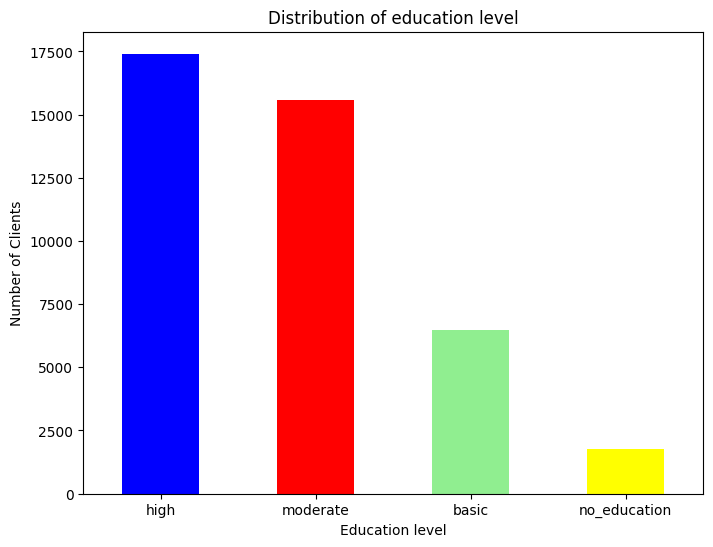

In [ ]:
education_level=data['education_level'].value_counts()
plt.figure(figsize=(8,6))
education_level.plot(kind='bar',color=['blue','red','lightgreen','yellow'])
plt.title('Distribution of education level')
plt.xlabel('Education level')
plt.ylabel('Number of Clients')
plt.xticks(rotation=0)
plt.show()

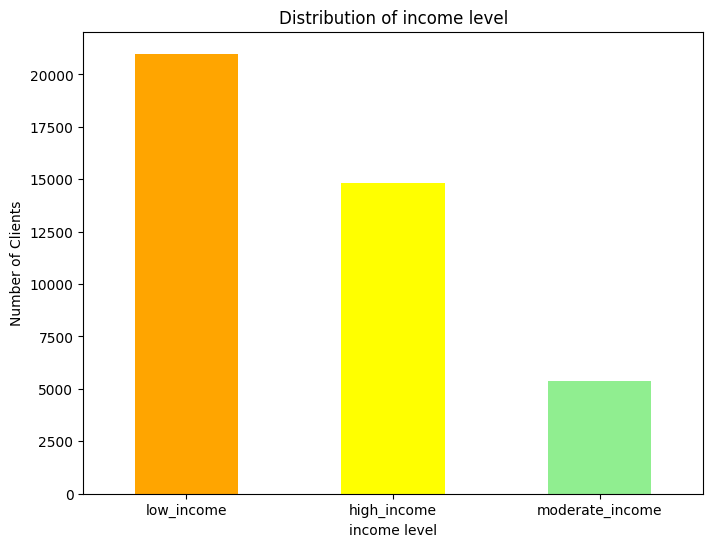

In [ ]:
job_category=data['job_category'].value_counts()
plt.figure(figsize=(8, 6))
job_category.plot(kind='bar',color=['orange','yellow','lightgreen'])
plt.title('Distribution of income level')
plt.xlabel('income level')
plt.ylabel('Number of Clients')
plt.xticks(rotation=0)
plt.show()

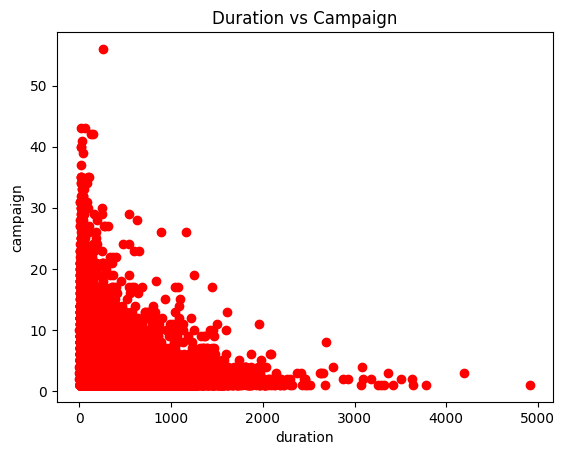

In [ ]:
duration = data['duration']
campaign = data['campaign']

plt.scatter(duration, campaign, marker='o', color=['red'])

plt.xlabel('duration')
plt.ylabel('campaign')
plt.title('Duration vs Campaign')

plt.show()

In [ ]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           41188 non-null  int64  
 1   duration                      41188 non-null  int64  
 2   campaign                      41188 non-null  int64  
 3   pdays                         41188 non-null  int64  
 4   previous                      41188 non-null  int64  
 5   emp.var.rate                  41188 non-null  float64
 6   cons.price.idx                41188 non-null  float64
 7   cons.conf.idx                 41188 non-null  float64
 8   euribor3m                     41188 non-null  float64
 9   nr.employed                   41188 non-null  float64
 10  y                             41188 non-null  int64  
 11  marital_married               41188 non-null  int64  
 12  marital_single                41188 non-null  int64  
 13  m

In [ ]:
data_encoded = pd.get_dummies(data_encoded, drop_first=True)

data_encoded = data_encoded.replace({'yes': 1, 'no': 0})

print(data_encoded.head())

   age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56       261         1    999         0           1.1          93.994   
1   57       149         1    999         0           1.1          93.994   
2   37       226         1    999         0           1.1          93.994   
3   40       151         1    999         0           1.1          93.994   
4   56       307         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  ...  poutcome_nonexistent  \
0          -36.4      4.857       5191.0  ...                     1   
1          -36.4      4.857       5191.0  ...                     1   
2          -36.4      4.857       5191.0  ...                     1   
3          -36.4      4.857       5191.0  ...                     1   
4          -36.4      4.857       5191.0  ...                     1   

   poutcome_success  job_category_low_income  job_category_moderate_income  \
0                 0             

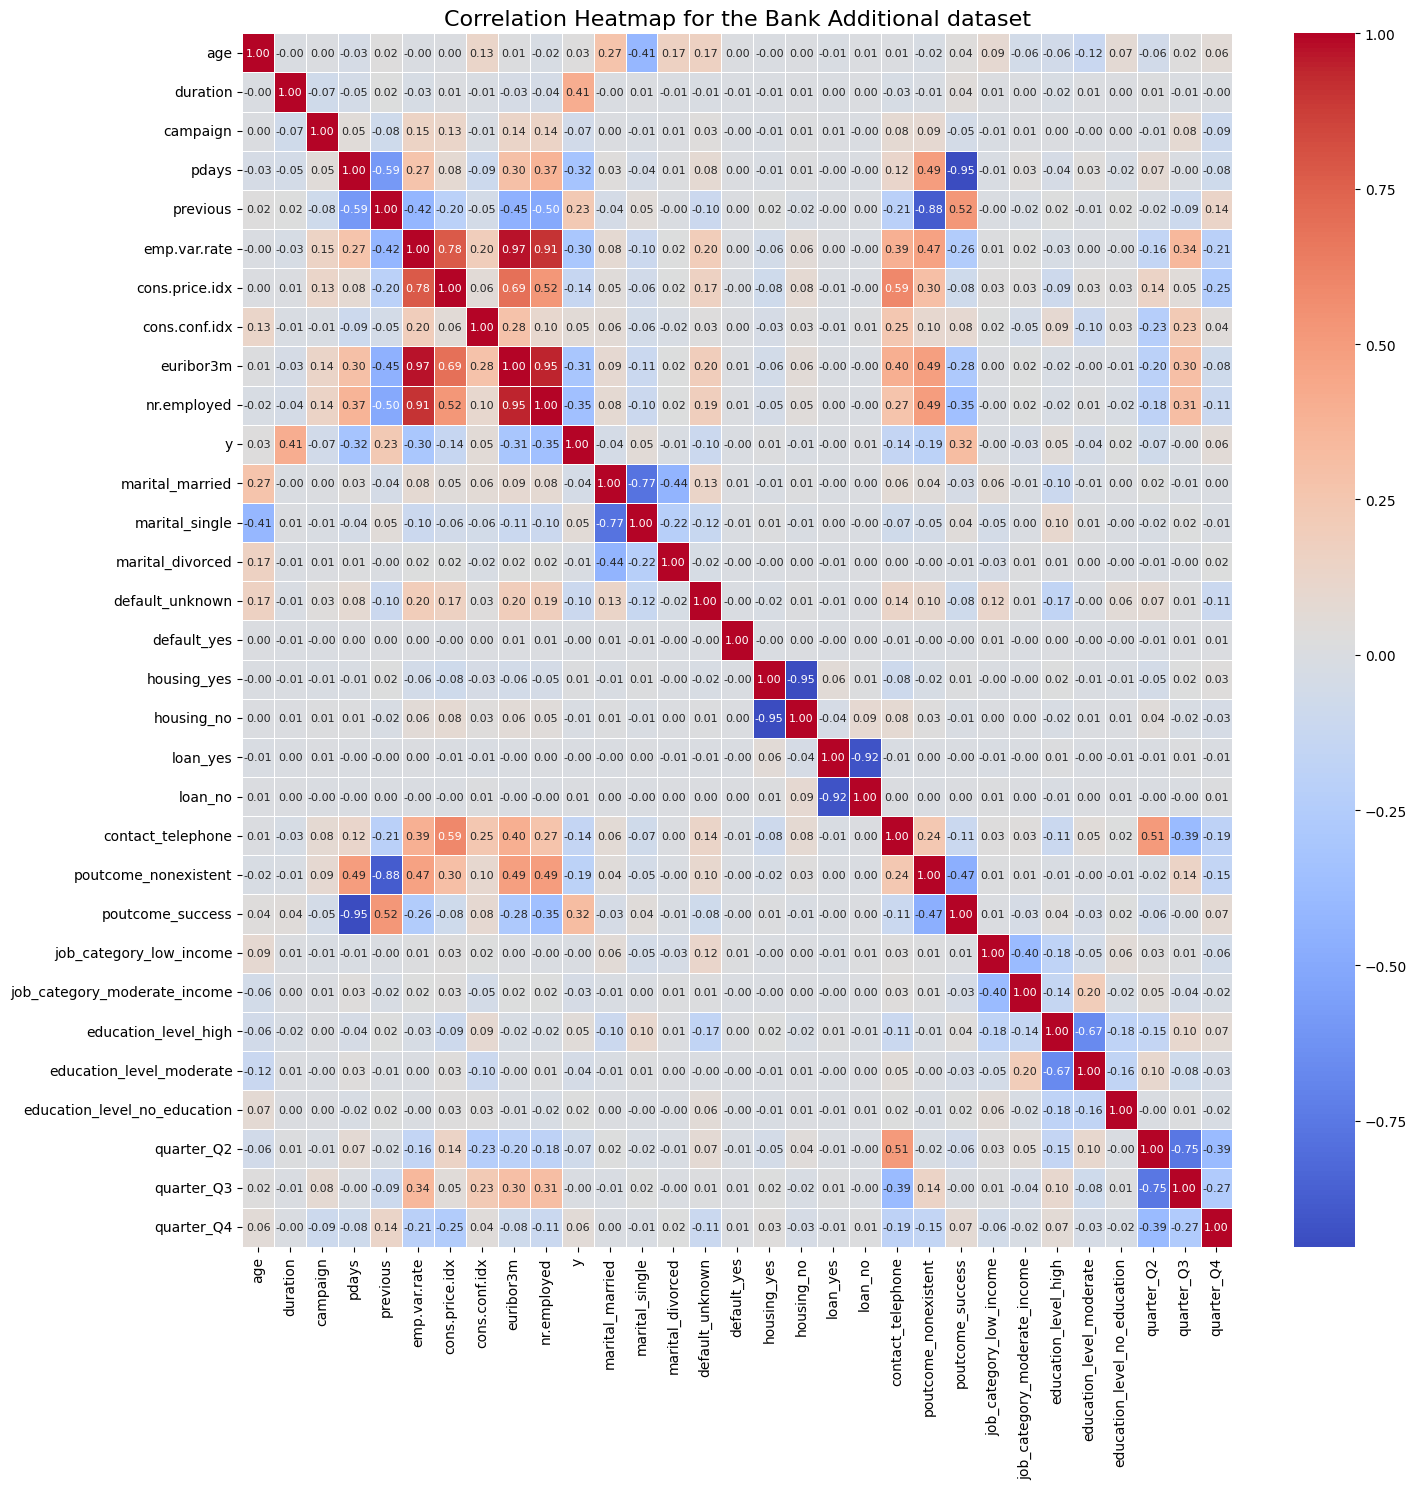

In [ ]:
corr_matrix = data_encoded.corr()

plt.figure(figsize=(15, 15))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5,
            annot_kws={"size": 8})

plt.title('Correlation Heatmap for the Bank Additional dataset', fontsize=16)

plt.tight_layout()
plt.show()

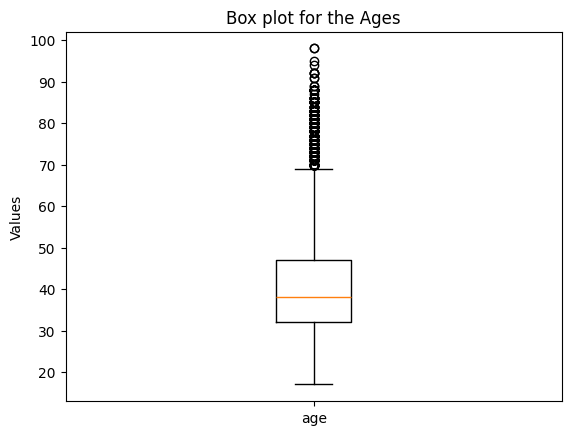

In [ ]:
# Extract data for box plot
data = [data['age']]

# Create a box plot
plt.boxplot(data, labels=['age'])

# Customize the plot
plt.ylabel('Values')
plt.title('Box plot for the Ages')

# Show the plot
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, train_size=0.70)

In [ ]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)

logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)
print(predictions)

['no' 'no' 'no' ... 'no' 'no' 'no']


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
z=confusion_matrix(y_test, predictions)
print(z)

[[10692   313]
 [  809   543]]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.9092012624423403

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          no       0.93      0.97      0.95     11005
         yes       0.63      0.40      0.49      1352

    accuracy                           0.91     12357
   macro avg       0.78      0.69      0.72     12357
weighted avg       0.90      0.91      0.90     12357



In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.20, train_size=0.80)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.25, train_size=0.75)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.30, train_size=0.70)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.40, train_size=0.60)
X_train5, X_test5, y_train5, y_test5 = train_test_split(X, y, test_size=0.50, train_size=0.50)

In [ ]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)

logreg.fit(X_train1, y_train1)
predictions1 = logreg.predict(X_test1)
print(predictions1)
print("Accuracy for 80-20 split:",accuracy_score(y_test1,predictions1))
print(confusion_matrix(y_test1,predictions1))
print(classification_report(y_test1,predictions1))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['no' 'no' 'no' ... 'no' 'no' 'yes']
Accuracy for 80-20 split: 0.9088370963826171
[[7103  203]
 [ 548  384]]
              precision    recall  f1-score   support

          no       0.93      0.97      0.95      7306
         yes       0.65      0.41      0.51       932

    accuracy                           0.91      8238
   macro avg       0.79      0.69      0.73      8238
weighted avg       0.90      0.91      0.90      8238



In [ ]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)

logreg.fit(X_train2, y_train2)
predictions2 = logreg.predict(X_test2)
print(predictions2)
print("Accuracy for 25-75 split:",accuracy_score(y_test2,predictions2))
print(confusion_matrix(y_test2,predictions2))
print(classification_report(y_test2,predictions2))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['no' 'no' 'no' ... 'no' 'no' 'no']
Accuracy for 25-75 split: 0.9092939691172186
[[8900  223]
 [ 711  463]]
              precision    recall  f1-score   support

          no       0.93      0.98      0.95      9123
         yes       0.67      0.39      0.50      1174

    accuracy                           0.91     10297
   macro avg       0.80      0.68      0.72     10297
weighted avg       0.90      0.91      0.90     10297



In [ ]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)

logreg.fit(X_train3, y_train3)
predictions3 = logreg.predict(X_test3)
print(predictions3)
print("Accuracy for 70-30 split:",accuracy_score(y_test3,predictions3))
print(confusion_matrix(y_test3,predictions3))
print(classification_report(y_test3,predictions3))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['no' 'no' 'no' ... 'no' 'no' 'no']
Accuracy for 70-30 split: 0.9083920045318443
[[10689   296]
 [  836   536]]
              precision    recall  f1-score   support

          no       0.93      0.97      0.95     10985
         yes       0.64      0.39      0.49      1372

    accuracy                           0.91     12357
   macro avg       0.79      0.68      0.72     12357
weighted avg       0.90      0.91      0.90     12357



In [ ]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)

logreg.fit(X_train4, y_train4)
predictions4 = logreg.predict(X_test4)
print(predictions4)
print("Accuracy for 20-80 split:",accuracy_score(y_test4,predictions4))
print(confusion_matrix(y_test4,predictions4))
print(classification_report(y_test4,predictions4))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['no' 'no' 'no' ... 'no' 'no' 'no']
Accuracy for 20-80 split: 0.9098689002184996
[[14287   364]
 [ 1121   704]]
              precision    recall  f1-score   support

          no       0.93      0.98      0.95     14651
         yes       0.66      0.39      0.49      1825

    accuracy                           0.91     16476
   macro avg       0.79      0.68      0.72     16476
weighted avg       0.90      0.91      0.90     16476



In [ ]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)

logreg.fit(X_train5, y_train5)
predictions5 = logreg.predict(X_test5)
print(predictions5)
print("Accuracy for 50-50 split:",accuracy_score(y_test5,predictions5))
print(confusion_matrix(y_test5,predictions5))
print(classification_report(y_test5,predictions5))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['no' 'no' 'no' ... 'no' 'no' 'no']
Accuracy for 50-50 split: 0.9086627172962999
[[17775   479]
 [ 1402   938]]
              precision    recall  f1-score   support

          no       0.93      0.97      0.95     18254
         yes       0.66      0.40      0.50      2340

    accuracy                           0.91     20594
   macro avg       0.79      0.69      0.72     20594
weighted avg       0.90      0.91      0.90     20594



In [ ]:
# Multi Collinearity
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [ ]:
print(data_encoded.shape)
print(data_encoded.info())

(41188, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           41188 non-null  int64  
 1   duration                      41188 non-null  int64  
 2   campaign                      41188 non-null  int64  
 3   pdays                         41188 non-null  int64  
 4   previous                      41188 non-null  int64  
 5   emp.var.rate                  41188 non-null  float64
 6   cons.price.idx                41188 non-null  float64
 7   cons.conf.idx                 41188 non-null  float64
 8   euribor3m                     41188 non-null  float64
 9   nr.employed                   41188 non-null  float64
 10  y                             41188 non-null  int64  
 11  marital_married               41188 non-null  int64  
 12  marital_single                41188 non-null  in

In [ ]:
X=data_encoded.drop(['y'],axis=1)
y = data_encoded['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i).round(1) for i in range(X.shape[1])]

    return(vif)

calc_vif(X)

,variables,VIF
0,age,20.8
1,duration,2.0
2,campaign,1.9
3,pdays,341.0
4,previous,6.6
5,emp.var.rate,61.0
6,cons.price.idx,38919.2
7,cons.conf.idx,165.7
8,euribor3m,480.6
9,nr.employed,46498.3


In [ ]:
calc_vif(X.drop('housing_yes', axis=1))

,variables,VIF
0,age,20.8
1,duration,2.0
2,campaign,1.9
3,pdays,341.0
4,previous,6.6
5,emp.var.rate,61.0
6,cons.price.idx,38919.2
7,cons.conf.idx,165.7
8,euribor3m,480.6
9,nr.employed,46498.3


In [ ]:
calc_vif(X.drop(['housing_yes','nr.employed'], axis=1))

,variables,VIF
0,age,20.8
1,duration,2.0
2,campaign,1.9
3,pdays,339.3
4,previous,6.5
5,emp.var.rate,33.4
6,cons.price.idx,1483.5
7,cons.conf.idx,134.6
8,euribor3m,186.9
9,marital_married,312.1


In [ ]:
calc_vif(X.drop(['housing_yes','nr.employed','cons.price.idx'], axis=1))

,variables,VIF
0,age,20.3
1,duration,2.0
2,campaign,1.9
3,pdays,256.2
4,previous,5.4
5,emp.var.rate,28.6
6,cons.conf.idx,107.5
7,euribor3m,158.5
8,marital_married,207.5
9,marital_single,96.0


In [ ]:
calc_vif(X.drop(['housing_yes','nr.employed','cons.price.idx','pdays'], axis=1))

,variables,VIF
0,age,20.0
1,duration,2.0
2,campaign,1.9
3,previous,5.2
4,emp.var.rate,26.2
5,cons.conf.idx,95.2
6,euribor3m,145.2
7,marital_married,173.4
8,marital_single,79.9
9,marital_divorced,33.2


In [ ]:
calc_vif(X.drop(['housing_yes','nr.employed','cons.price.idx','pdays','marital_married'], axis=1))

,variables,VIF
0,age,19.3
1,duration,2.0
2,campaign,1.9
3,previous,4.9
4,emp.var.rate,18.6
5,cons.conf.idx,64.5
6,euribor3m,105.3
7,marital_single,1.8
8,marital_divorced,1.2
9,default_unknown,1.4


In [ ]:
calc_vif(X.drop(['housing_yes','nr.employed','cons.price.idx','pdays','marital_married','euribor3m'], axis=1))

,variables,VIF
0,age,18.5
1,duration,2.0
2,campaign,1.9
3,previous,4.9
4,emp.var.rate,2.2
5,cons.conf.idx,63.2
6,marital_single,1.8
7,marital_divorced,1.2
8,default_unknown,1.4
9,default_yes,1.0


In [ ]:
calc_vif(X.drop(['housing_yes','nr.employed','cons.price.idx','pdays','marital_married','euribor3m','cons.conf.idx'], axis=1))

,variables,VIF
0,age,18.0
1,duration,2.0
2,campaign,1.9
3,previous,4.6
4,emp.var.rate,2.2
5,marital_single,1.7
6,marital_divorced,1.2
7,default_unknown,1.4
8,default_yes,1.0
9,housing_no,1.9


In [ ]:
calc_vif(X.drop(['housing_yes','nr.employed','cons.price.idx','pdays','marital_married','euribor3m','cons.conf.idx','loan_no'], axis=1))

,variables,VIF
0,age,17.3
1,duration,2.0
2,campaign,1.9
3,previous,4.4
4,emp.var.rate,2.2
5,marital_single,1.7
6,marital_divorced,1.2
7,default_unknown,1.4
8,default_yes,1.0
9,housing_no,1.8


In [ ]:
calc_vif(X.drop(['housing_yes','nr.employed','cons.price.idx','pdays','marital_married','euribor3m','cons.conf.idx','loan_no','poutcome_nonexistent'], axis=1))

,variables,VIF
0,age,16.2
1,duration,2.0
2,campaign,1.9
3,previous,1.8
4,emp.var.rate,2.1
5,marital_single,1.7
6,marital_divorced,1.2
7,default_unknown,1.4
8,default_yes,1.0
9,housing_no,1.8


In [ ]:
calc_vif(X.drop(['housing_yes','nr.employed','cons.price.idx','pdays','marital_married','euribor3m','cons.conf.idx','loan_no','poutcome_nonexistent','age'], axis=1))

,variables,VIF
0,duration,2.0
1,campaign,1.9
2,previous,1.8
3,emp.var.rate,2.1
4,marital_single,1.5
5,marital_divorced,1.2
6,default_unknown,1.4
7,default_yes,1.0
8,housing_no,1.8
9,loan_yes,1.2


In [ ]:
calc_vif(X.drop(['housing_yes','nr.employed','cons.price.idx','pdays','marital_married','euribor3m','cons.conf.idx','loan_no','poutcome_nonexistent','age','quarter_Q2'], axis=1))

,variables,VIF
0,duration,1.9
1,campaign,1.8
2,previous,1.8
3,emp.var.rate,2.0
4,marital_single,1.5
5,marital_divorced,1.2
6,default_unknown,1.3
7,default_yes,1.0
8,housing_no,1.8
9,loan_yes,1.2


In [ ]:
import statsmodels.api as sm

model = sm.OLS(y_train, X_train).fit()

print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.418
Model:                            OLS   Adj. R-squared (uncentered):              0.418
Method:                 Least Squares   F-statistic:                              816.7
Date:                Fri, 20 Dec 2024   Prob (F-statistic):                        0.00
Time:                        04:52:40   Log-Likelihood:                         -1892.9
No. Observations:               32950   AIC:                                      3844.
Df Residuals:                   32921   BIC:                                      4087.
Df Model:                          29                                                  
Covariance Type:            nonrobust                                                  
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [ ]:
X_nomulti = X.drop(['housing_yes','nr.employed','cons.price.idx','pdays','marital_married','euribor3m','cons.conf.idx','loan_no','poutcome_nonexistent','age','quarter_Q2'], axis=1)

X_train1_nomulti, X_test1_nomulti, y_train1_nomulti, y_test1_nomulti = train_test_split(X_nomulti, y, test_size=0.20, train_size=0.80, random_state=1)
X_train2_nomulti, X_test2_nomulti, y_train2_nomulti, y_test2_nomulti = train_test_split(X_nomulti, y, test_size=0.25, train_size=0.75, random_state=1)
X_train3_nomulti, X_test3_nomulti, y_train3_nomulti, y_test3_nomulti = train_test_split(X_nomulti, y, test_size=0.30, train_size=0.70, random_state=1)
X_train4_nomulti, X_test4_nomulti, y_train4_nomulti, y_test4_nomulti = train_test_split(X_nomulti, y, test_size=0.40, train_size=0.60, random_state=1)
X_train5_nomulti, X_test5_nomulti, y_train5_nomulti, y_test5_nomulti = train_test_split(X_nomulti, y, test_size=0.50, train_size=0.50, random_state=1)

In [ ]:
import statsmodels.api as sm

model1 = sm.OLS(y_train1_nomulti, X_train1_nomulti).fit()

print(model1.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.386
Model:                            OLS   Adj. R-squared (uncentered):              0.386
Method:                 Least Squares   F-statistic:                              1092.
Date:                Fri, 20 Dec 2024   Prob (F-statistic):                        0.00
Time:                        04:52:40   Log-Likelihood:                         -2662.6
No. Observations:               32950   AIC:                                      5363.
Df Residuals:                   32931   BIC:                                      5523.
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [ ]:
model2 = sm.OLS(y_train2_nomulti, X_train2_nomulti).fit()

print(model2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.386
Model:                            OLS   Adj. R-squared (uncentered):              0.386
Method:                 Least Squares   F-statistic:                              1023.
Date:                Fri, 20 Dec 2024   Prob (F-statistic):                        0.00
Time:                        04:52:40   Log-Likelihood:                         -2545.5
No. Observations:               30891   AIC:                                      5129.
Df Residuals:                   30872   BIC:                                      5287.
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [ ]:
model3 = sm.OLS(y_train3_nomulti, X_train3_nomulti).fit()

print(model3.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.388
Model:                            OLS   Adj. R-squared (uncentered):              0.387
Method:                 Least Squares   F-statistic:                              959.8
Date:                Fri, 20 Dec 2024   Prob (F-statistic):                        0.00
Time:                        04:52:41   Log-Likelihood:                         -2272.0
No. Observations:               28831   AIC:                                      4582.
Df Residuals:                   28812   BIC:                                      4739.
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [ ]:
model4 = sm.OLS(y_train4_nomulti, X_train4_nomulti).fit()

print(model4.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.388
Model:                            OLS   Adj. R-squared (uncentered):              0.388
Method:                 Least Squares   F-statistic:                              823.9
Date:                Fri, 20 Dec 2024   Prob (F-statistic):                        0.00
Time:                        04:52:41   Log-Likelihood:                         -1935.2
No. Observations:               24712   AIC:                                      3908.
Df Residuals:                   24693   BIC:                                      4063.
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [ ]:
model5 = sm.OLS(y_train5_nomulti, X_train5_nomulti).fit()

print(model5.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.384
Model:                            OLS   Adj. R-squared (uncentered):              0.383
Method:                 Least Squares   F-statistic:                              674.3
Date:                Fri, 20 Dec 2024   Prob (F-statistic):                        0.00
Time:                        04:52:41   Log-Likelihood:                         -1611.0
No. Observations:               20594   AIC:                                      3260.
Df Residuals:                   20575   BIC:                                      3411.
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

K Nearest Neighbors before VIF

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.20, train_size=0.80)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.25, train_size=0.75)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.30, train_size=0.70)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.40, train_size=0.60)
X_train5, X_test5, y_train5, y_test5 = train_test_split(X, y, test_size=0.50, train_size=0.50)

80-20 Ratio

In [ ]:
model=KNeighborsClassifier(n_neighbors=25)
model.fit(X_train1,y_train1)

KNeighborsClassifier(n_neighbors=25)

In [ ]:
y_pred1 = model.predict(X_test1)
print(y_pred1)

[0 0 0 ... 0 0 0]


In [ ]:
df=pd.DataFrame({'Predicted':y_pred1,'Actual':y_test1})
print(df)

       Predicted  Actual
30893          0       0
383            0       0
17015          0       0
27245          0       0
27382          0       0
...          ...     ...
14512          0       0
21634          0       0
808            0       0
23128          0       0
28408          0       0

[8238 rows x 2 columns]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test1,y_pred1)

0.91442097596504

In [ ]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test1,y_pred1)
cm1

array([[7044,  268],
       [ 437,  489]])

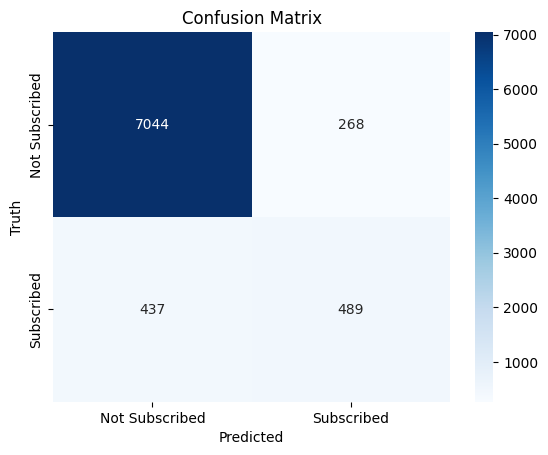

In [ ]:
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Subscribed", "Subscribed"], yticklabels=["Not Subscribed", "Subscribed"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_metrics1 = classification_report(y_test1, y_pred1)
print(classification_metrics1)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7312
           1       0.65      0.53      0.58       926

    accuracy                           0.91      8238
   macro avg       0.79      0.75      0.77      8238
weighted avg       0.91      0.91      0.91      8238



75-25 Ratio

In [ ]:
model=KNeighborsClassifier(n_neighbors=25)
model.fit(X_train2,y_train2)

KNeighborsClassifier(n_neighbors=25)

In [ ]:
y_pred2 = model.predict(X_test2)
print(y_pred2)

[0 0 0 ... 0 1 1]


In [ ]:
df=pd.DataFrame({'Predicted':y_pred2,'Actual':y_test2})
print(df)

       Predicted  Actual
35526          0       0
26710          0       0
5653           0       0
1894           0       0
8299           0       0
...          ...     ...
39195          1       1
29169          0       0
12955          0       0
31463          1       1
39960          1       1

[10297 rows x 2 columns]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test2,y_pred2)

0.9111391667475964

In [ ]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test2,y_pred2)
cm2

array([[8843,  307],
       [ 608,  539]])

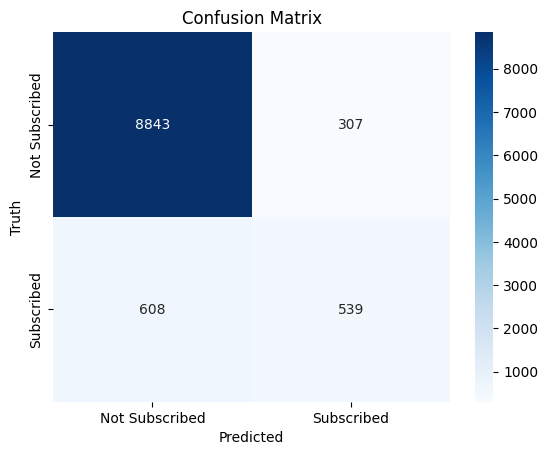

In [ ]:
sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Subscribed", "Subscribed"], yticklabels=["Not Subscribed", "Subscribed"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_metrics2 = classification_report(y_test2, y_pred2)
print(classification_metrics2)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      9150
           1       0.64      0.47      0.54      1147

    accuracy                           0.91     10297
   macro avg       0.79      0.72      0.75     10297
weighted avg       0.90      0.91      0.91     10297



70-30 Ratio

In [ ]:
model=KNeighborsClassifier(n_neighbors=25)
model.fit(X_train3,y_train3)

KNeighborsClassifier(n_neighbors=25)

In [ ]:
y_pred3 = model.predict(X_test3)
print(y_pred3)

[0 0 0 ... 0 0 0]


In [ ]:
df=pd.DataFrame({'Predicted':y_pred3,'Actual':y_test3})
print(df)

       Predicted  Actual
4325           0       0
1609           0       0
27319          0       0
33325          0       0
29943          0       0
...          ...     ...
26548          0       1
9797           0       0
32108          0       0
27124          0       0
22322          0       0

[12357 rows x 2 columns]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test3,y_pred3)

0.911952739338027

In [ ]:
from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(y_test3,y_pred3)
cm3

array([[10583,   403],
       [  685,   686]])

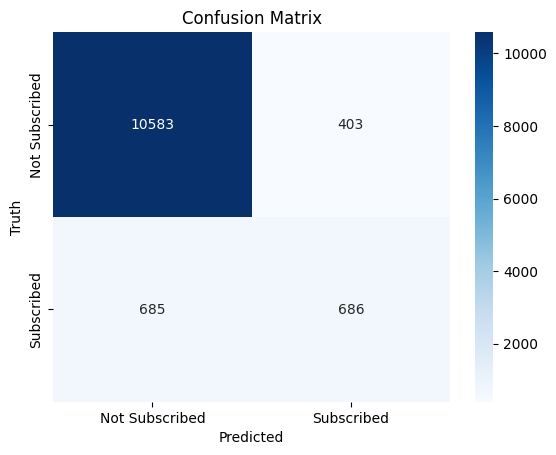

In [ ]:
sns.heatmap(cm3, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Subscribed", "Subscribed"], yticklabels=["Not Subscribed", "Subscribed"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_metrics3 = classification_report(y_test3, y_pred3)
print(classification_metrics3)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10986
           1       0.63      0.50      0.56      1371

    accuracy                           0.91     12357
   macro avg       0.78      0.73      0.75     12357
weighted avg       0.90      0.91      0.91     12357



60-40 Ratio

In [ ]:
model=KNeighborsClassifier(n_neighbors=25)
model.fit(X_train4,y_train4)

KNeighborsClassifier(n_neighbors=25)

In [ ]:
y_pred4 = model.predict(X_test4)
print(y_pred4)

[0 0 0 ... 0 0 0]


In [ ]:
df=pd.DataFrame({'Predicted':y_pred4,'Actual':y_test4})
print(df)

       Predicted  Actual
1284           0       0
6720           0       0
39053          0       0
5464           0       0
3965           0       0
...          ...     ...
5995           0       0
1058           0       0
14429          0       0
23494          0       0
1131           0       0

[16476 rows x 2 columns]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test4,y_pred4)

0.9094440398154892

In [ ]:
from sklearn.metrics import confusion_matrix
cm4 = confusion_matrix(y_test4,y_pred4)
cm4

array([[14072,   517],
       [  975,   912]])

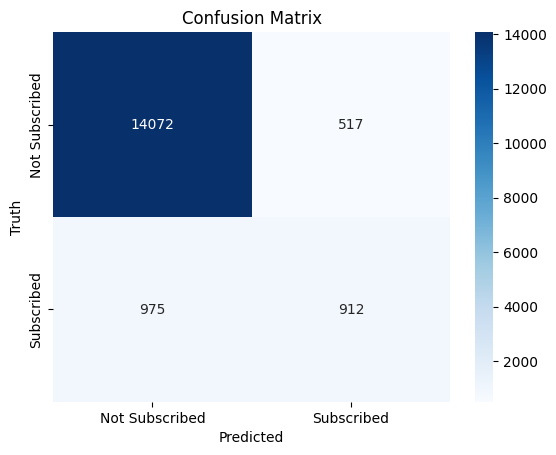

In [ ]:
sns.heatmap(cm4, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Subscribed", "Subscribed"], yticklabels=["Not Subscribed", "Subscribed"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_metrics4 = classification_report(y_test4, y_pred4)
print(classification_metrics4)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     14589
           1       0.64      0.48      0.55      1887

    accuracy                           0.91     16476
   macro avg       0.79      0.72      0.75     16476
weighted avg       0.90      0.91      0.90     16476



50-50 Ratio

In [ ]:
model=KNeighborsClassifier(n_neighbors=25)
model.fit(X_train5,y_train5)

KNeighborsClassifier(n_neighbors=25)

In [ ]:
y_pred5 = model.predict(X_test5)
print(y_pred5)

[0 0 0 ... 0 1 0]


In [ ]:
df=pd.DataFrame({'Predicted':y_pred5,'Actual':y_test5})
print(df)

       Predicted  Actual
20769          0       0
37348          0       0
12317          0       0
31331          0       0
19664          0       0
...          ...     ...
5819           0       0
20205          0       0
36644          0       0
39066          1       1
40526          0       0

[20594 rows x 2 columns]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test5,y_pred5)

0.9125473438865689

In [ ]:
from sklearn.metrics import confusion_matrix
cm5 = confusion_matrix(y_test5,y_pred5)
cm5

array([[17648,   590],
       [ 1211,  1145]])

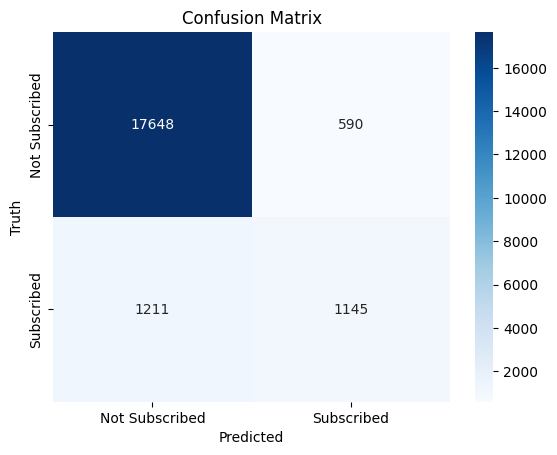

In [ ]:
sns.heatmap(cm5, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Subscribed", "Subscribed"], yticklabels=["Not Subscribed", "Subscribed"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_metrics5 = classification_report(y_test5, y_pred5)
print(classification_metrics5)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     18238
           1       0.66      0.49      0.56      2356

    accuracy                           0.91     20594
   macro avg       0.80      0.73      0.76     20594
weighted avg       0.90      0.91      0.91     20594



Support Vector Machine before VIF

In [ ]:
from sklearn.svm import SVC

80-20 Ratio

In [ ]:
model = SVC(kernel='sigmoid')
model.fit(X_train1, y_train1)

SVC(kernel='sigmoid')

In [ ]:
y_pred1 = model.predict(X_test1)
print(y_pred1)

[0 0 0 ... 0 0 0]


In [ ]:
df = pd.DataFrame({'Predicted':y_pred1,'Actual':y_test1})
print(df)

       Predicted  Actual
30893          0       0
383            0       0
17015          0       0
27245          0       0
27382          0       0
...          ...     ...
14512          0       0
21634          0       0
808            0       0
23128          0       0
28408          0       0

[8238 rows x 2 columns]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test1,y_pred1)

0.8974265598446225

In [ ]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test1,y_pred1)
cm1

array([[7192,  120],
       [ 725,  201]])

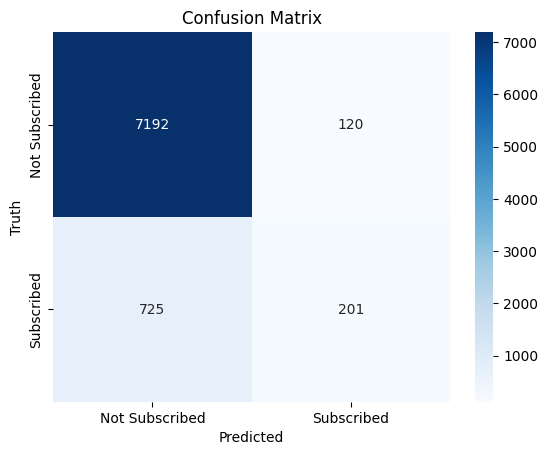

In [ ]:
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Subscribed", "Subscribed"], yticklabels=["Not Subscribed", "Subscribed"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_metrics1 = classification_report(y_test1, y_pred1)
print(classification_metrics1)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7312
           1       0.63      0.22      0.32       926

    accuracy                           0.90      8238
   macro avg       0.77      0.60      0.63      8238
weighted avg       0.88      0.90      0.87      8238



75-25 Ratio

In [ ]:
model = SVC(kernel='sigmoid')
model.fit(X_train2, y_train2)

SVC(kernel='sigmoid')

In [ ]:
y_pred2 = model.predict(X_test2)
print(y_pred2)

[0 0 0 ... 0 0 1]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test2,y_pred2)

0.8990968243177625

In [ ]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test2,y_pred2)
cm2

array([[9016,  134],
       [ 905,  242]])

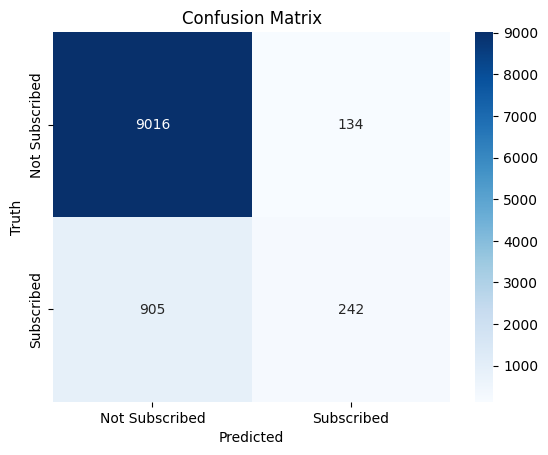

In [ ]:
sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Subscribed", "Subscribed"], yticklabels=["Not Subscribed", "Subscribed"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_metrics2 = classification_report(y_test2, y_pred2)
print(classification_metrics2)

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      9150
           1       0.64      0.21      0.32      1147

    accuracy                           0.90     10297
   macro avg       0.78      0.60      0.63     10297
weighted avg       0.88      0.90      0.88     10297



70-30 Ratio

In [ ]:
model = SVC(kernel='sigmoid')
model.fit(X_train3, y_train3)

SVC(kernel='sigmoid')

In [ ]:
y_pred3 = model.predict(X_test3)
print(y_pred3)

[0 0 0 ... 0 0 0]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test3,y_pred3)

0.8977907259043457

In [ ]:
from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(y_test3,y_pred3)
cm3

array([[10807,   179],
       [ 1084,   287]])

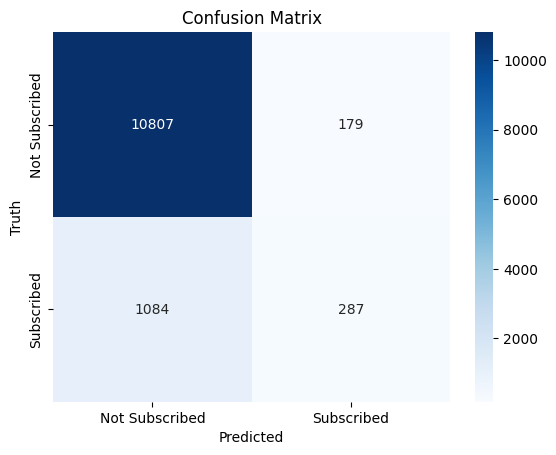

In [ ]:
sns.heatmap(cm3, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Subscribed", "Subscribed"], yticklabels=["Not Subscribed", "Subscribed"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_metrics3 = classification_report(y_test3, y_pred3)
print(classification_metrics3)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10986
           1       0.62      0.21      0.31      1371

    accuracy                           0.90     12357
   macro avg       0.76      0.60      0.63     12357
weighted avg       0.88      0.90      0.87     12357



60-40 Ratio

In [ ]:
model = SVC(kernel='sigmoid')
model.fit(X_train4, y_train4)

SVC(kernel='sigmoid')

In [ ]:
y_pred4 = model.predict(X_test4)
print(y_pred4)

[0 0 0 ... 0 0 0]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test4,y_pred4)

0.8918426802621996

In [ ]:
from sklearn.metrics import confusion_matrix
cm4 = confusion_matrix(y_test4,y_pred4)
cm4

array([[14332,   257],
       [ 1525,   362]])

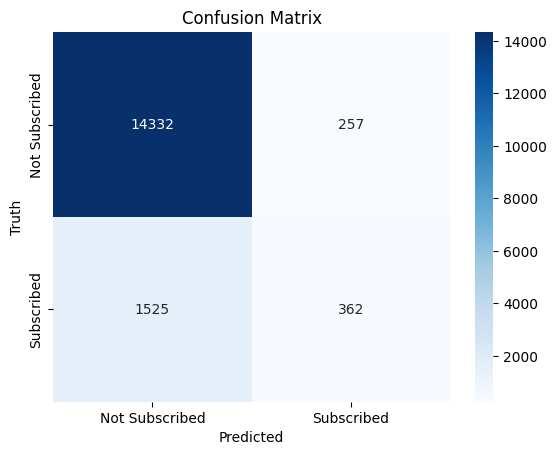

In [ ]:
sns.heatmap(cm4, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Subscribed", "Subscribed"], yticklabels=["Not Subscribed", "Subscribed"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_metrics4 = classification_report(y_test4, y_pred4)
print(classification_metrics4)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     14589
           1       0.58      0.19      0.29      1887

    accuracy                           0.89     16476
   macro avg       0.74      0.59      0.62     16476
weighted avg       0.87      0.89      0.87     16476



50-50 Ratio

In [ ]:
model = SVC(kernel='sigmoid')
model.fit(X_train5, y_train5)

SVC(kernel='sigmoid')

In [ ]:
y_pred5 = model.predict(X_test5)
print(y_pred5)

[0 0 0 ... 0 0 0]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test5,y_pred5)

0.8976400893464116

In [ ]:
from sklearn.metrics import confusion_matrix
cm5 = confusion_matrix(y_test5,y_pred5)
cm5

array([[17973,   265],
       [ 1843,   513]])

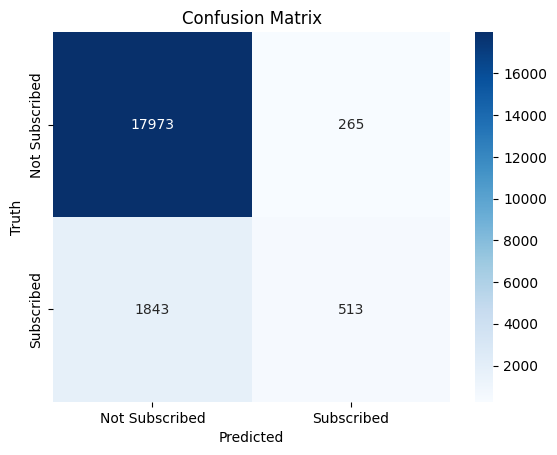

In [ ]:
sns.heatmap(cm5, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Subscribed", "Subscribed"], yticklabels=["Not Subscribed", "Subscribed"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_metrics5 = classification_report(y_test5, y_pred5)
print(classification_metrics5)

              precision    recall  f1-score   support

           0       0.91      0.99      0.94     18238
           1       0.66      0.22      0.33      2356

    accuracy                           0.90     20594
   macro avg       0.78      0.60      0.64     20594
weighted avg       0.88      0.90      0.87     20594



Decision Tree Classifier before VIF

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

80-20 Ratio

In [ ]:
clf = DecisionTreeClassifier()
clf1 = clf.fit(X_train1,y_train1)
print(clf1)

DecisionTreeClassifier()


In [ ]:
y_pred1 = clf.predict(X_test1)
print(y_pred1)

[0 0 0 ... 0 0 0]


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

Accuracy: 0.8861374119932023


75-25 Ratio

In [ ]:
clf = DecisionTreeClassifier()
clf2 = clf.fit(X_train2,y_train2)
print(clf2)

DecisionTreeClassifier()


In [ ]:
y_pred2 = clf.predict(X_test2)
print(y_pred2)

[0 0 0 ... 0 1 0]


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))

Accuracy: 0.8921044964552782


70-30 Ratio

In [ ]:
clf = DecisionTreeClassifier()
clf3 = clf.fit(X_train3,y_train3)
print(clf3)

DecisionTreeClassifier()


In [ ]:
y_pred3 = clf.predict(X_test3)
print(y_pred3)

[0 0 0 ... 0 0 0]


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test3, y_pred3))

Accuracy: 0.8876750020231448


60-40 Ratio

In [ ]:
clf = DecisionTreeClassifier()
clf4 = clf.fit(X_train4,y_train4)
print(clf4)

DecisionTreeClassifier()


In [ ]:
y_pred4 = clf.predict(X_test4)
print(y_pred4)

[0 0 0 ... 0 0 0]


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test4, y_pred4))

Accuracy: 0.8865622723962127


50-50 Ratio

In [ ]:
clf = DecisionTreeClassifier()
clf5 = clf.fit(X_train5,y_train5)
print(clf5)

DecisionTreeClassifier()


In [ ]:
y_pred5 = clf.predict(X_test5)
print(y_pred5)

[0 0 0 ... 1 1 0]


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test5, y_pred5))

Accuracy: 0.8888996795183063


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree

from matplotlib import pyplot as plt

80-20 Ratio

In [ ]:
print(X_train1.shape)
print(y_train1.shape)
print(X_test1.shape)
print(y_test1.shape)

(32950, 30)
(32950,)
(8238, 30)
(8238,)


In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train1, y_train1)

RandomForestClassifier()

In [ ]:
y_pred1 = rf.predict(X_test1)
print(y_pred1)

[0 0 0 ... 0 0 0]


In [ ]:
print(classification_report(y_test1, y_pred1))
print(confusion_matrix(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7312
           1       0.66      0.50      0.57       926

    accuracy                           0.92      8238
   macro avg       0.80      0.74      0.76      8238
weighted avg       0.91      0.92      0.91      8238

[[7073  239]
 [ 459  467]]


75-25 Ratio

In [ ]:
print(X_train2.shape)
print(y_train2.shape)
print(X_test2.shape)
print(y_test2.shape)

(30891, 30)
(30891,)
(10297, 30)
(10297,)


In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train2, y_train2)

RandomForestClassifier()

In [ ]:
y_pred2 = rf.predict(X_test2)
print(y_pred2)

[0 0 0 ... 0 1 1]


In [ ]:
print(classification_report(y_test2, y_pred2))
print(confusion_matrix(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      9150
           1       0.65      0.48      0.55      1147

    accuracy                           0.91     10297
   macro avg       0.79      0.72      0.75     10297
weighted avg       0.90      0.91      0.91     10297

[[8851  299]
 [ 602  545]]


70-30 Ratio

In [ ]:
print(X_train3.shape)
print(y_train3.shape)
print(X_test3.shape)
print(y_test3.shape)

(28831, 30)
(28831,)
(12357, 30)
(12357,)


In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train3, y_train3)

RandomForestClassifier()

In [ ]:
y_pred3 = rf.predict(X_test3)
print(y_pred3)

[0 0 0 ... 0 0 0]


In [ ]:
print(classification_report(y_test3, y_pred3))
print(confusion_matrix(y_test3, y_pred3))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     10986
           1       0.61      0.46      0.53      1371

    accuracy                           0.91     12357
   macro avg       0.77      0.71      0.74     12357
weighted avg       0.90      0.91      0.90     12357

[[10585   401]
 [  738   633]]


60-40 Ratio

In [ ]:
print(X_train4.shape)
print(y_train4.shape)
print(X_test4.shape)
print(y_test4.shape)

(24712, 30)
(24712,)
(16476, 30)
(16476,)


In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train4, y_train4)

RandomForestClassifier()

In [ ]:
y_pred4 = rf.predict(X_test4)
print(y_pred4)

[0 0 0 ... 0 0 0]


In [ ]:
print(classification_report(y_test4, y_pred4))
print(confusion_matrix(y_test4, y_pred4))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     14589
           1       0.65      0.47      0.54      1887

    accuracy                           0.91     16476
   macro avg       0.79      0.72      0.75     16476
weighted avg       0.90      0.91      0.90     16476

[[14103   486]
 [  999   888]]


50-50 Ratio

In [ ]:
print(X_train5.shape)
print(y_train5.shape)
print(X_test5.shape)
print(y_test5.shape)

(20594, 30)
(20594,)
(20594, 30)
(20594,)


In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train5, y_train5)

RandomForestClassifier()

In [ ]:
y_pred5 = rf.predict(X_test5)
print(y_pred5)

[0 0 0 ... 0 1 0]


In [ ]:
print(classification_report(y_test5, y_pred5))
print(confusion_matrix(y_test5, y_pred5))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     18238
           1       0.67      0.48      0.56      2356

    accuracy                           0.91     20594
   macro avg       0.80      0.73      0.76     20594
weighted avg       0.90      0.91      0.91     20594

[[17675   563]
 [ 1220  1136]]


XG Boosting before VIF

In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

80-20 Ratio

In [ ]:
model = xgb.XGBClassifier()
model = model.fit(X_train1, y_train1)

In [ ]:
y_pred1 = model.predict(X_test1)
print(y_pred1)

[0 0 0 ... 0 0 0]


In [ ]:
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7312
           1       0.65      0.55      0.60       926

    accuracy                           0.92      8238
   macro avg       0.80      0.76      0.78      8238
weighted avg       0.91      0.92      0.91      8238



In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

Accuracy: 0.9167273610099539


In [ ]:
cm1 = confusion_matrix(y_test1, y_pred1)
cm1

array([[7040,  272],
       [ 414,  512]])

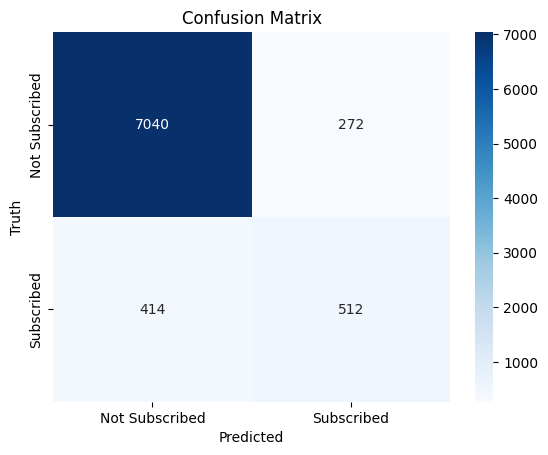

In [ ]:
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Subscribed", "Subscribed"], yticklabels=["Not Subscribed", "Subscribed"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

75-25 Ratio

In [ ]:
model = xgb.XGBClassifier()
model = model.fit(X_train2, y_train2)

In [ ]:
y_pred2 = model.predict(X_test2)
print(y_pred2)

[0 0 0 ... 0 1 1]


In [ ]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      9150
           1       0.65      0.52      0.57      1147

    accuracy                           0.91     10297
   macro avg       0.79      0.74      0.76     10297
weighted avg       0.91      0.91      0.91     10297



In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))

Accuracy: 0.914829562008352


In [ ]:
cm2 = confusion_matrix(y_test2, y_pred2)
cm2

array([[8828,  322],
       [ 555,  592]])

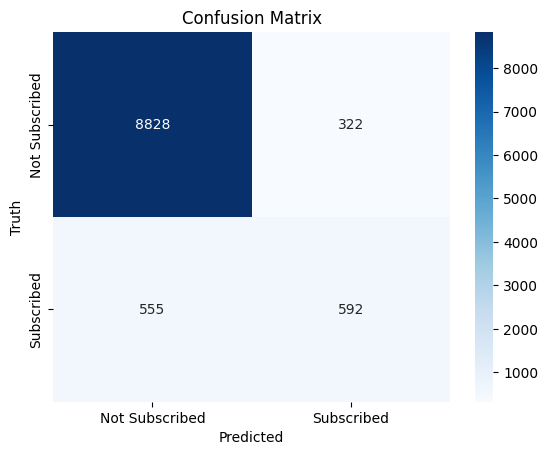

In [ ]:
sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Subscribed", "Subscribed"], yticklabels=["Not Subscribed", "Subscribed"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

70-30 Ratio

In [ ]:
model = xgb.XGBClassifier()
model = model.fit(X_train3, y_train3)

In [ ]:
y_pred3 = model.predict(X_test3)
print(y_pred3)

[0 0 0 ... 0 0 0]


In [ ]:
print(classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10986
           1       0.60      0.54      0.57      1371

    accuracy                           0.91     12357
   macro avg       0.77      0.75      0.76     12357
weighted avg       0.91      0.91      0.91     12357



In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test3, y_pred3))

Accuracy: 0.9094440398154892


In [ ]:
cm3 = confusion_matrix(y_test3, y_pred3)
cm3

array([[10497,   489],
       [  630,   741]])

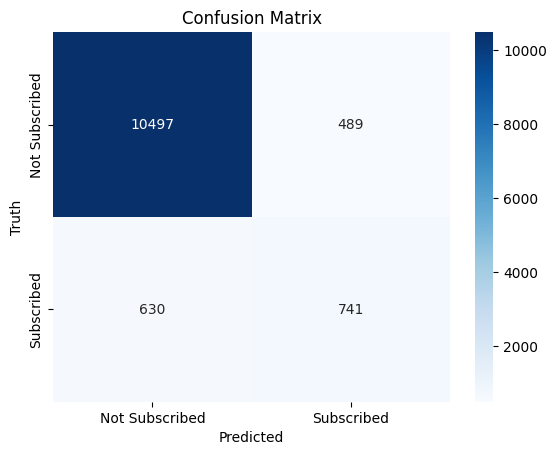

In [ ]:
sns.heatmap(cm3, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Subscribed", "Subscribed"], yticklabels=["Not Subscribed", "Subscribed"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

60-40 Ratio

In [ ]:
model = xgb.XGBClassifier()
model = model.fit(X_train4, y_train4)

In [ ]:
y_pred4 = model.predict(X_test4)
print(y_pred4)

[0 0 0 ... 0 0 0]


In [ ]:
print(classification_report(y_test4, y_pred4))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     14589
           1       0.63      0.53      0.58      1887

    accuracy                           0.91     16476
   macro avg       0.79      0.75      0.76     16476
weighted avg       0.91      0.91      0.91     16476



In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test4, y_pred4))

Accuracy: 0.9106579266812334


In [ ]:
cm4 = confusion_matrix(y_test4, y_pred4)
cm4

array([[14000,   589],
       [  883,  1004]])

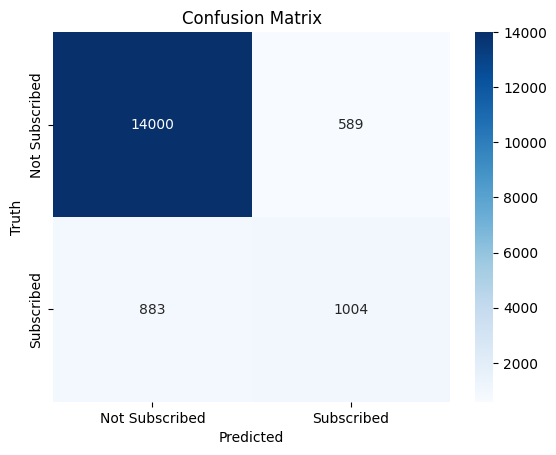

In [ ]:
sns.heatmap(cm4, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Subscribed", "Subscribed"], yticklabels=["Not Subscribed", "Subscribed"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

50-50 Ratio

In [ ]:
model = xgb.XGBClassifier()
model = model.fit(X_train5, y_train5)

In [ ]:
y_pred5 = model.predict(X_test5)
print(y_pred5)

[0 0 0 ... 0 1 0]


In [ ]:
print(classification_report(y_test5, y_pred5))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     18238
           1       0.65      0.54      0.59      2356

    accuracy                           0.91     20594
   macro avg       0.80      0.75      0.77     20594
weighted avg       0.91      0.91      0.91     20594



In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test5, y_pred5))

Accuracy: 0.9149266776731086


In [ ]:
cm5 = confusion_matrix(y_test5, y_pred5)
cm5

array([[17563,   675],
       [ 1077,  1279]])

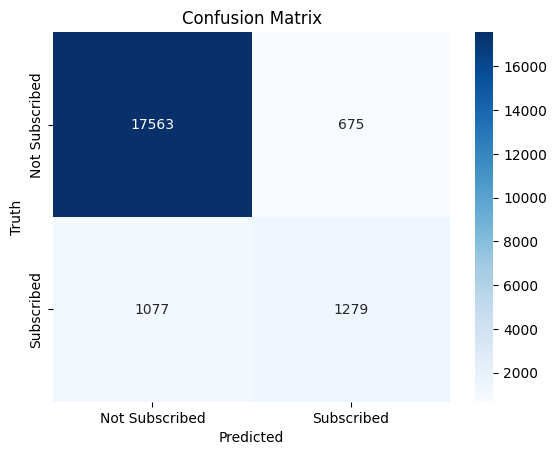

In [ ]:
sns.heatmap(cm5, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Subscribed", "Subscribed"], yticklabels=["Not Subscribed", "Subscribed"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

ADA Boosting before VIF

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

80-20 Ratio

In [ ]:
model = AdaBoostClassifier(n_estimators=50, random_state=42)
model.fit(X_train1, y_train1)

AdaBoostClassifier(random_state=42)

In [ ]:
y_pred1 = model.predict(X_test1)
print(y_pred1)

[0 0 0 ... 0 0 0]


In [ ]:
accuracy = accuracy_score(y_test1, y_pred1)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test1, y_pred1))

Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7312
           1       0.64      0.40      0.49       926

    accuracy                           0.91      8238
   macro avg       0.79      0.69      0.72      8238
weighted avg       0.90      0.91      0.90      8238



75-25 Ratio

In [ ]:
model = AdaBoostClassifier(n_estimators=50, random_state=42)
model.fit(X_train2, y_train2)

AdaBoostClassifier(random_state=42)

In [ ]:
y_pred2 = model.predict(X_test2)
print(y_pred2)

[0 0 0 ... 0 1 1]


In [ ]:
accuracy = accuracy_score(y_test2, y_pred2)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test2, y_pred2))

Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      9150
           1       0.66      0.37      0.47      1147

    accuracy                           0.91     10297
   macro avg       0.79      0.67      0.71     10297
weighted avg       0.90      0.91      0.90     10297



70-30 Ratio

In [ ]:
model = AdaBoostClassifier(n_estimators=50, random_state=42)
model.fit(X_train3, y_train3)

AdaBoostClassifier(random_state=42)

In [ ]:
y_pred3 = model.predict(X_test3)
print(y_pred3)

[0 0 0 ... 0 0 0]


In [ ]:
accuracy = accuracy_score(y_test3, y_pred3)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test3, y_pred3))

Accuracy: 0.90
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10986
           1       0.60      0.40      0.48      1371

    accuracy                           0.90     12357
   macro avg       0.76      0.68      0.71     12357
weighted avg       0.89      0.90      0.90     12357



60-40 Ratio

In [ ]:
model = AdaBoostClassifier(n_estimators=50, random_state=42)
model.fit(X_train4, y_train4)

AdaBoostClassifier(random_state=42)

In [ ]:
y_pred4 = model.predict(X_test4)
print(y_pred4)

[0 0 0 ... 0 0 0]


In [ ]:
accuracy = accuracy_score(y_test4, y_pred4)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test4, y_pred4))

Accuracy: 0.90
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     14589
           1       0.65      0.34      0.44      1887

    accuracy                           0.90     16476
   macro avg       0.78      0.66      0.69     16476
weighted avg       0.89      0.90      0.89     16476



50-50 Ratio

In [ ]:
model = AdaBoostClassifier(n_estimators=50, random_state=42)
model.fit(X_train5, y_train5)

AdaBoostClassifier(random_state=42)

In [ ]:
y_pred5 = model.predict(X_test5)
print(y_pred5)

[0 0 0 ... 0 1 0]


In [ ]:
accuracy = accuracy_score(y_test5, y_pred5)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test5, y_pred5))

Accuracy: 0.90
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     18238
           1       0.63      0.41      0.50      2356

    accuracy                           0.90     20594
   macro avg       0.78      0.69      0.72     20594
weighted avg       0.89      0.90      0.90     20594



Logistic Regression after VIF

In [ ]:
X_nomulti = X.drop(['housing_yes','nr.employed','cons.price.idx','pdays','marital_married','euribor3m','cons.conf.idx','loan_no','poutcome_nonexistent','age','quarter_Q2'], axis=1)

X_train1_nomulti, X_test1_nomulti, y_train1_nomulti, y_test1_nomulti = train_test_split(X_nomulti, y, test_size=0.20, train_size=0.80, random_state=1)
X_train2_nomulti, X_test2_nomulti, y_train2_nomulti, y_test2_nomulti = train_test_split(X_nomulti, y, test_size=0.25, train_size=0.75, random_state=1)
X_train3_nomulti, X_test3_nomulti, y_train3_nomulti, y_test3_nomulti = train_test_split(X_nomulti, y, test_size=0.30, train_size=0.70, random_state=1)
X_train4_nomulti, X_test4_nomulti, y_train4_nomulti, y_test4_nomulti = train_test_split(X_nomulti, y, test_size=0.40, train_size=0.60, random_state=1)
X_train5_nomulti, X_test5_nomulti, y_train5_nomulti, y_test5_nomulti = train_test_split(X_nomulti, y, test_size=0.50, train_size=0.50, random_state=1)

In [ ]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)

logreg.fit(X_train1_nomulti, y_train1_nomulti)
predictions1 = logreg.predict(X_test1_nomulti)
print(predictions1)
print("Accuracy for 80-20 split:",accuracy_score(y_test1_nomulti,predictions1))
print(confusion_matrix(y_test1_nomulti,predictions1))
print(classification_report(y_test1_nomulti,predictions1))

[0 0 0 ... 0 0 0]
Accuracy for 80-20 split: 0.9056809905316825
[[7100  194]
 [ 583  361]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7294
           1       0.65      0.38      0.48       944

    accuracy                           0.91      8238
   macro avg       0.79      0.68      0.71      8238
weighted avg       0.89      0.91      0.89      8238



In [ ]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)

logreg.fit(X_train2_nomulti, y_train2_nomulti)
predictions2 = logreg.predict(X_test2_nomulti)
print(predictions2)
print("Accuracy for 75-25 split:",accuracy_score(y_test2_nomulti,predictions2))
print(confusion_matrix(y_test2_nomulti,predictions2))
print(classification_report(y_test2_nomulti,predictions2))

[0 0 0 ... 0 0 0]
Accuracy for 75-25 split: 0.9063804991745168
[[8904  228]
 [ 736  429]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      9132
           1       0.65      0.37      0.47      1165

    accuracy                           0.91     10297
   macro avg       0.79      0.67      0.71     10297
weighted avg       0.89      0.91      0.89     10297



In [ ]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)

logreg.fit(X_train3_nomulti, y_train3_nomulti)
predictions3 = logreg.predict(X_test3_nomulti)
print(predictions3)
print("Accuracy for 70-30 split:",accuracy_score(y_test3_nomulti,predictions3))
print(confusion_matrix(y_test3_nomulti,predictions3))
print(classification_report(y_test3_nomulti,predictions3))

[0 0 0 ... 0 0 0]
Accuracy for 70-30 split: 0.9049931213077608
[[10668   276]
 [  898   515]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     10944
           1       0.65      0.36      0.47      1413

    accuracy                           0.90     12357
   macro avg       0.79      0.67      0.71     12357
weighted avg       0.89      0.90      0.89     12357



In [ ]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)

logreg.fit(X_train4_nomulti, y_train4_nomulti)
predictions4 = logreg.predict(X_test4_nomulti)
print(predictions4)
print("Accuracy for 60-40 split:",accuracy_score(y_test4_nomulti,predictions4))
print(confusion_matrix(y_test4_nomulti,predictions4))
print(classification_report(y_test4_nomulti,predictions4))

[0 0 0 ... 0 1 0]
Accuracy for 60-40 split: 0.9038601602330663
[[14203   398]
 [ 1186   689]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     14601
           1       0.63      0.37      0.47      1875

    accuracy                           0.90     16476
   macro avg       0.78      0.67      0.71     16476
weighted avg       0.89      0.90      0.89     16476



In [ ]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)

logreg.fit(X_train5_nomulti, y_train5_nomulti)
predictions5 = logreg.predict(X_test5_nomulti)
print(predictions5)
print("Accuracy for 50-50 split:",accuracy_score(y_test5_nomulti,predictions5))
print(confusion_matrix(y_test5_nomulti,predictions5))
print(classification_report(y_test5_nomulti,predictions5))

[0 0 0 ... 0 0 1]
Accuracy for 50-50 split: 0.9053122268621929
[[17801   441]
 [ 1509   843]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     18242
           1       0.66      0.36      0.46      2352

    accuracy                           0.91     20594
   macro avg       0.79      0.67      0.71     20594
weighted avg       0.89      0.91      0.89     20594



K Nearest Neighbors after VIF

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

80-20 Ratio

In [ ]:
model=KNeighborsClassifier(n_neighbors=25)
model.fit(X_train1_nomulti,y_train1_nomulti)

KNeighborsClassifier(n_neighbors=25)

In [ ]:
y_pred1 = model.predict(X_test1_nomulti)
print(y_pred1)

[0 0 0 ... 0 0 0]


In [ ]:
df=pd.DataFrame({'Predicted':y_pred1,'Actual':y_test1_nomulti})
print(df)

       Predicted  Actual
35577          0       0
13950          0       0
29451          0       1
32295          0       0
27477          0       0
...          ...     ...
8337           0       0
29097          1       1
30687          0       0
33048          0       0
24024          0       1

[8238 rows x 2 columns]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test1_nomulti,y_pred1)

0.8924496236950716

In [ ]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test1_nomulti,y_pred1)
cm1

array([[7137,  157],
       [ 729,  215]])

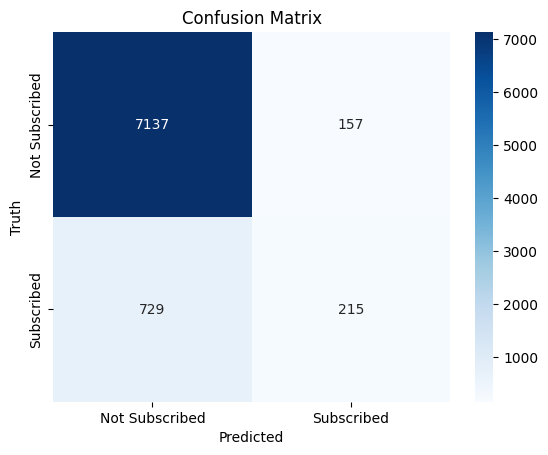

In [ ]:
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Subscribed", "Subscribed"], yticklabels=["Not Subscribed", "Subscribed"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_metrics1 = classification_report(y_test1_nomulti, y_pred1)
print(classification_metrics1)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7294
           1       0.58      0.23      0.33       944

    accuracy                           0.89      8238
   macro avg       0.74      0.60      0.63      8238
weighted avg       0.87      0.89      0.87      8238



75-25 Ratio

In [ ]:
model=KNeighborsClassifier(n_neighbors=25)
model.fit(X_train2_nomulti,y_train2_nomulti)

KNeighborsClassifier(n_neighbors=25)

In [ ]:
y_pred2 = model.predict(X_test2_nomulti)
print(y_pred2)

[0 0 0 ... 0 0 0]


In [ ]:
df=pd.DataFrame({'Predicted':y_pred2,'Actual':y_test2_nomulti})
print(df)

       Predicted  Actual
35577          0       0
13950          0       0
29451          0       1
32295          0       0
27477          0       0
...          ...     ...
19229          0       0
15890          1       1
40087          0       0
25076          0       0
39705          0       0

[10297 rows x 2 columns]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test2_nomulti,y_pred2)

0.8938525784208993

In [ ]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test2_nomulti,y_pred2)
cm2

array([[8937,  195],
       [ 898,  267]])

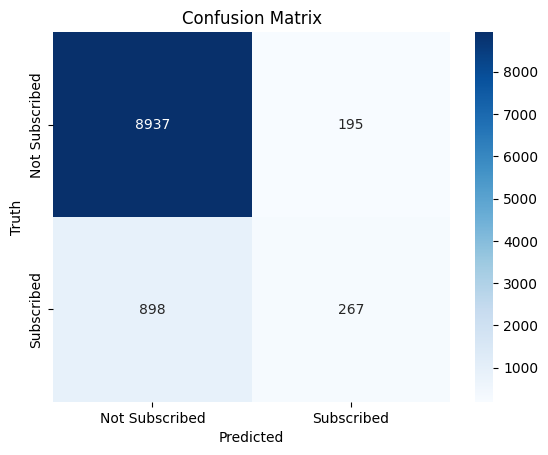

In [ ]:
sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Subscribed", "Subscribed"], yticklabels=["Not Subscribed", "Subscribed"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_metrics2 = classification_report(y_test2_nomulti, y_pred2)
print(classification_metrics2)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      9132
           1       0.58      0.23      0.33      1165

    accuracy                           0.89     10297
   macro avg       0.74      0.60      0.64     10297
weighted avg       0.87      0.89      0.87     10297



70-30 Ratio

In [ ]:
model=KNeighborsClassifier(n_neighbors=25)
model.fit(X_train3_nomulti,y_train3_nomulti)

KNeighborsClassifier(n_neighbors=25)

In [ ]:
y_pred3 = model.predict(X_test3_nomulti)
print(y_pred3)

[0 0 0 ... 0 0 0]


In [ ]:
df=pd.DataFrame({'Predicted':y_pred3,'Actual':y_test3_nomulti})
print(df)

       Predicted  Actual
35577          0       0
13950          0       0
29451          0       1
32295          0       0
27477          0       0
...          ...     ...
33344          0       0
11690          1       1
25695          0       0
10932          0       0
1230           0       0

[12357 rows x 2 columns]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test3_nomulti,y_pred3)

0.8922877721129724

In [ ]:
from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(y_test3_nomulti,y_pred3)
cm3

array([[10722,   222],
       [ 1109,   304]])

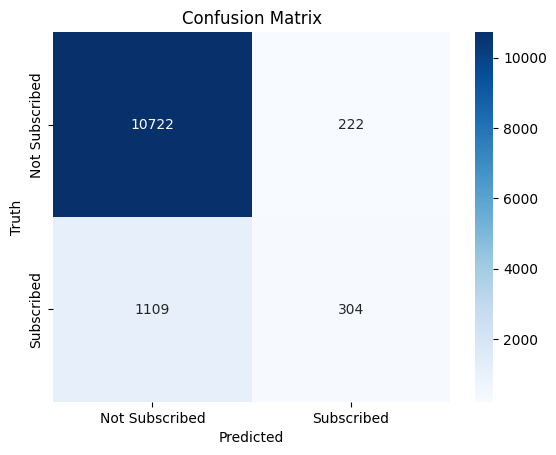

In [ ]:
sns.heatmap(cm3, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Subscribed", "Subscribed"], yticklabels=["Not Subscribed", "Subscribed"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_metrics3 = classification_report(y_test3_nomulti, y_pred3)
print(classification_metrics3)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10944
           1       0.58      0.22      0.31      1413

    accuracy                           0.89     12357
   macro avg       0.74      0.60      0.63     12357
weighted avg       0.87      0.89      0.87     12357



60-40 Ratio

In [ ]:
model=KNeighborsClassifier(n_neighbors=25)
model.fit(X_train4_nomulti,y_train4_nomulti)

KNeighborsClassifier(n_neighbors=25)

In [ ]:
y_pred4 = model.predict(X_test4_nomulti)
print(y_pred4)

[0 0 0 ... 0 1 0]


In [ ]:
df=pd.DataFrame({'Predicted':y_pred4,'Actual':y_test4_nomulti})
print(df)

       Predicted  Actual
35577          0       0
13950          0       0
29451          0       1
32295          0       0
27477          0       0
...          ...     ...
7019           0       0
27810          0       1
993            0       0
38882          1       1
36817          0       0

[16476 rows x 2 columns]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test4_nomulti,y_pred4)

0.8924496236950716

In [ ]:
from sklearn.metrics import confusion_matrix
cm4 = confusion_matrix(y_test4_nomulti,y_pred4)
cm4

array([[14313,   288],
       [ 1484,   391]])

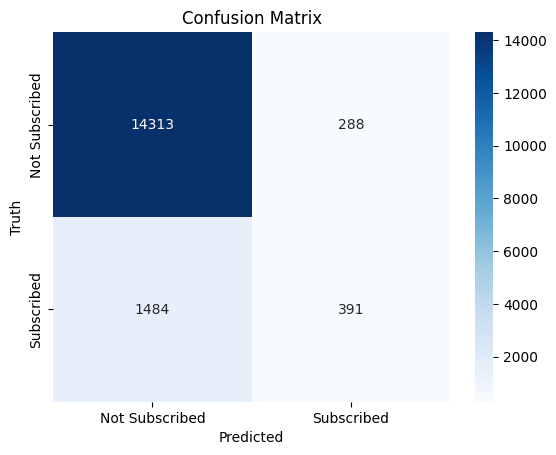

In [ ]:
sns.heatmap(cm4, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Subscribed", "Subscribed"], yticklabels=["Not Subscribed", "Subscribed"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_metrics4 = classification_report(y_test4_nomulti, y_pred4)
print(classification_metrics4)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     14601
           1       0.58      0.21      0.31      1875

    accuracy                           0.89     16476
   macro avg       0.74      0.59      0.62     16476
weighted avg       0.87      0.89      0.87     16476



50-50 Ratio

In [ ]:
model=KNeighborsClassifier(n_neighbors=25)
model.fit(X_train5_nomulti,y_train5_nomulti)

KNeighborsClassifier(n_neighbors=25)

In [ ]:
y_pred5 = model.predict(X_test5_nomulti)
print(y_pred5)

[0 0 0 ... 0 0 0]


In [ ]:
df=pd.DataFrame({'Predicted':y_pred5,'Actual':y_test5_nomulti})
print(df)

       Predicted  Actual
35577          0       0
13950          0       0
29451          0       1
32295          0       0
27477          0       0
...          ...     ...
9074           0       0
410            0       0
12036          0       0
3204           0       0
38124          0       0

[20594 rows x 2 columns]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test5_nomulti,y_pred5)

0.8922987277847917

In [ ]:
from sklearn.metrics import confusion_matrix
cm5 = confusion_matrix(y_test5_nomulti,y_pred5)
cm5

array([[17902,   340],
       [ 1878,   474]])

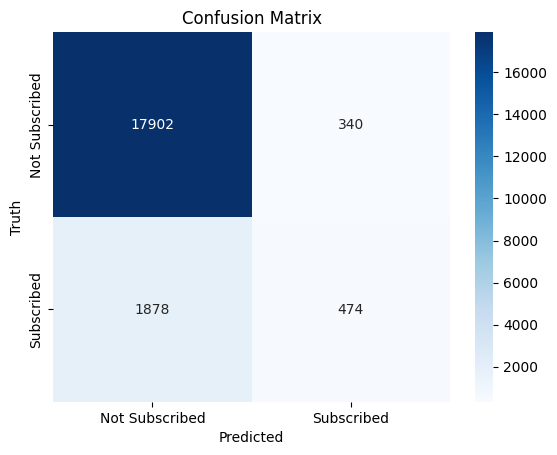

In [ ]:
sns.heatmap(cm5, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Subscribed", "Subscribed"], yticklabels=["Not Subscribed", "Subscribed"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_metrics5 = classification_report(y_test5_nomulti, y_pred5)
print(classification_metrics5)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     18242
           1       0.58      0.20      0.30      2352

    accuracy                           0.89     20594
   macro avg       0.74      0.59      0.62     20594
weighted avg       0.87      0.89      0.87     20594



Support Vector Machine after VIF

In [ ]:
from sklearn.svm import SVC

80-20 Ratio

In [ ]:
model = SVC(kernel='sigmoid')
model.fit(X_train1_nomulti, y_train1_nomulti)

SVC(kernel='sigmoid')

In [ ]:
y_pred1 = model.predict(X_test1_nomulti)
print(y_pred1)

[0 0 1 ... 0 0 0]


In [ ]:
df=pd.DataFrame({'Predicted':y_pred1,'Actual':y_test1_nomulti})
print(df)

       Predicted  Actual
35577          0       0
13950          0       0
29451          1       1
32295          0       0
27477          0       0
...          ...     ...
8337           1       0
29097          0       1
30687          0       0
33048          0       0
24024          0       1

[8238 rows x 2 columns]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test1_nomulti,y_pred1)

0.805778101480942

In [ ]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test1_nomulti,y_pred1)
cm1

array([[6564,  730],
       [ 870,   74]])

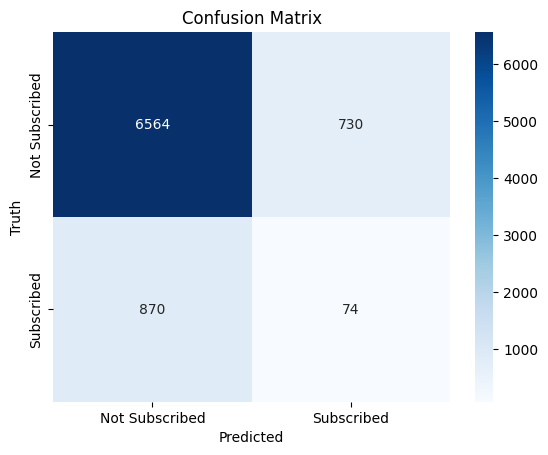

In [ ]:
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Subscribed", "Subscribed"], yticklabels=["Not Subscribed", "Subscribed"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_metrics1 = classification_report(y_test1_nomulti, y_pred1)
print(classification_metrics1)

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      7294
           1       0.09      0.08      0.08       944

    accuracy                           0.81      8238
   macro avg       0.49      0.49      0.49      8238
weighted avg       0.79      0.81      0.80      8238



75-25 Ratio

In [ ]:
model = SVC(kernel='sigmoid')
model.fit(X_train2_nomulti, y_train2_nomulti)

SVC(kernel='sigmoid')

In [ ]:
y_pred2 = model.predict(X_test2_nomulti)
print(y_pred2)

[0 0 1 ... 0 0 0]


In [ ]:
df=pd.DataFrame({'Predicted':y_pred2,'Actual':y_test2_nomulti})
print(df)

       Predicted  Actual
35577          0       0
13950          0       0
29451          1       1
32295          0       0
27477          0       0
...          ...     ...
19229          0       0
15890          0       1
40087          0       0
25076          0       0
39705          0       0

[10297 rows x 2 columns]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test2_nomulti,y_pred2)

0.8079052151111974

In [ ]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test2_nomulti,y_pred2)
cm2

array([[8224,  908],
       [1070,   95]])

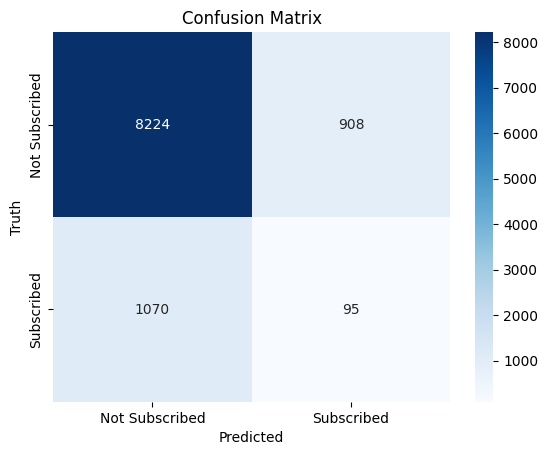

In [ ]:
sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Subscribed", "Subscribed"], yticklabels=["Not Subscribed", "Subscribed"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_metrics2 = classification_report(y_test2_nomulti, y_pred2)
print(classification_metrics2)

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      9132
           1       0.09      0.08      0.09      1165

    accuracy                           0.81     10297
   macro avg       0.49      0.49      0.49     10297
weighted avg       0.80      0.81      0.80     10297



70-30 Ratio

In [ ]:
model = SVC(kernel='sigmoid')
model.fit(X_train3_nomulti, y_train3_nomulti)

SVC(kernel='sigmoid')

In [ ]:
y_pred3 = model.predict(X_test3_nomulti)
print(y_pred3)

[0 0 1 ... 0 1 0]


In [ ]:
df=pd.DataFrame({'Predicted':y_pred3,'Actual':y_test3_nomulti})
print(df)

       Predicted  Actual
35577          0       0
13950          0       0
29451          1       1
32295          0       0
27477          0       0
...          ...     ...
33344          0       0
11690          0       1
25695          0       0
10932          1       0
1230           0       0

[12357 rows x 2 columns]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test3_nomulti,y_pred3)

0.8063445820182892

In [ ]:
from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(y_test3_nomulti,y_pred3)
cm3

array([[9854, 1090],
       [1303,  110]])

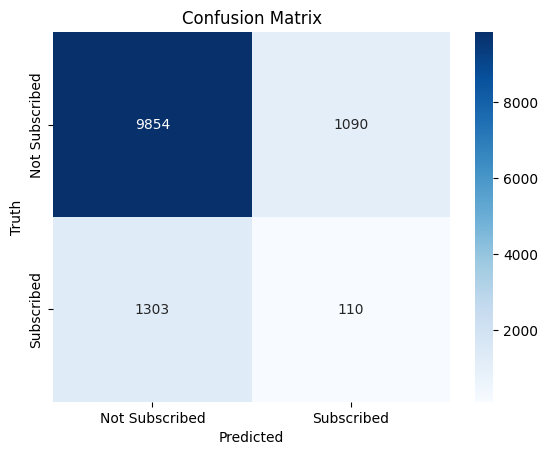

In [ ]:
sns.heatmap(cm3, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Subscribed", "Subscribed"], yticklabels=["Not Subscribed", "Subscribed"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_metrics3 = classification_report(y_test3_nomulti, y_pred3)
print(classification_metrics3)

              precision    recall  f1-score   support

           0       0.88      0.90      0.89     10944
           1       0.09      0.08      0.08      1413

    accuracy                           0.81     12357
   macro avg       0.49      0.49      0.49     12357
weighted avg       0.79      0.81      0.80     12357



60-40 Ratio

In [ ]:
model = SVC(kernel='sigmoid')
model.fit(X_train4_nomulti, y_train4_nomulti)

SVC(kernel='sigmoid')

In [ ]:
y_pred4 = model.predict(X_test4_nomulti)
print(y_pred4)

[0 0 1 ... 0 0 0]


In [ ]:
df=pd.DataFrame({'Predicted':y_pred4,'Actual':y_test4_nomulti})
print(df)

       Predicted  Actual
35577          0       0
13950          0       0
29451          1       1
32295          0       0
27477          0       0
...          ...     ...
7019           0       0
27810          0       1
993            0       0
38882          0       1
36817          0       0

[16476 rows x 2 columns]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test4_nomulti,y_pred4)

0.8026826899732945

In [ ]:
from sklearn.metrics import confusion_matrix
cm4 = confusion_matrix(y_test4_nomulti,y_pred4)
cm4

array([[13078,  1523],
       [ 1728,   147]])

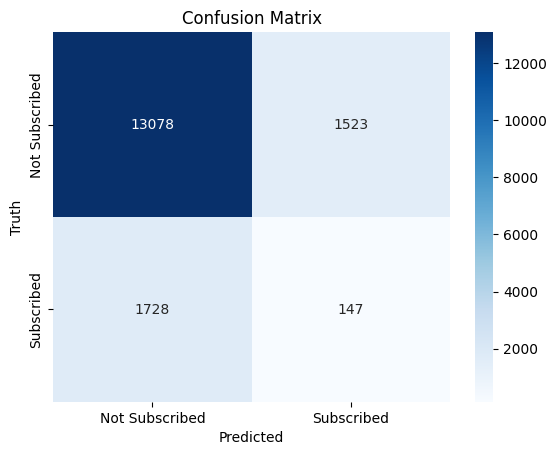

In [ ]:
sns.heatmap(cm4, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Subscribed", "Subscribed"], yticklabels=["Not Subscribed", "Subscribed"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_metrics4 = classification_report(y_test4_nomulti, y_pred4)
print(classification_metrics4)

              precision    recall  f1-score   support

           0       0.88      0.90      0.89     14601
           1       0.09      0.08      0.08      1875

    accuracy                           0.80     16476
   macro avg       0.49      0.49      0.49     16476
weighted avg       0.79      0.80      0.80     16476



50-50 Ratio

In [ ]:
model = SVC(kernel='sigmoid')
model.fit(X_train5_nomulti, y_train5_nomulti)

SVC(kernel='sigmoid')

In [ ]:
y_pred5 = model.predict(X_test5_nomulti)
print(y_pred5)

[0 0 1 ... 0 1 0]


In [ ]:
df=pd.DataFrame({'Predicted':y_pred5,'Actual':y_test5_nomulti})
print(df)

       Predicted  Actual
35577          0       0
13950          0       0
29451          1       1
32295          0       0
27477          0       0
...          ...     ...
9074           1       0
410            0       0
12036          0       0
3204           1       0
38124          0       0

[20594 rows x 2 columns]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test5_nomulti,y_pred5)

0.8027095270467126

In [ ]:
from sklearn.metrics import confusion_matrix
cm5 = confusion_matrix(y_test5_nomulti,y_pred5)
cm5

array([[16341,  1901],
       [ 2162,   190]])

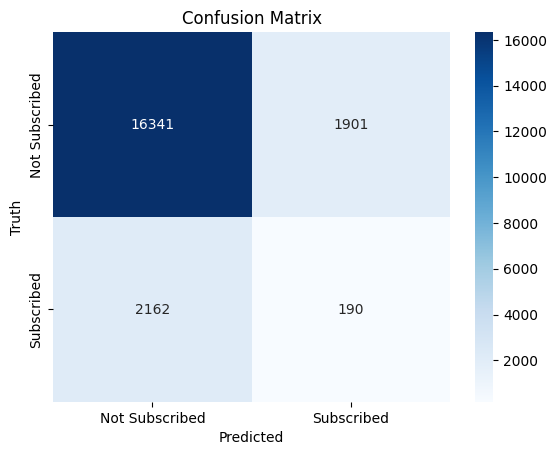

In [ ]:
sns.heatmap(cm5, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Subscribed", "Subscribed"], yticklabels=["Not Subscribed", "Subscribed"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_metrics5 = classification_report(y_test5_nomulti, y_pred5)
print(classification_metrics5)

              precision    recall  f1-score   support

           0       0.88      0.90      0.89     18242
           1       0.09      0.08      0.09      2352

    accuracy                           0.80     20594
   macro avg       0.49      0.49      0.49     20594
weighted avg       0.79      0.80      0.80     20594



Decision Tree Classifier after VIF

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

80-20 Ratio

In [ ]:
clf = DecisionTreeClassifier()
clf1 = clf.fit(X_train1_nomulti,y_train1_nomulti)
print(clf1)

DecisionTreeClassifier()


In [ ]:
y_pred1 = clf.predict(X_test1_nomulti)
print(y_pred1)

[0 0 0 ... 0 0 0]


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test1_nomulti, y_pred1))

Accuracy: 0.8759407623209516


75-25 Ratio

In [ ]:
clf = DecisionTreeClassifier()
clf2 = clf.fit(X_train2_nomulti,y_train2_nomulti)
print(clf2)

DecisionTreeClassifier()


In [ ]:
y_pred2 = clf.predict(X_test2_nomulti)
print(y_pred2)

[0 0 0 ... 0 0 0]


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test2_nomulti, y_pred2))

Accuracy: 0.8784111877245799


70-30 Ratio

In [ ]:
clf = DecisionTreeClassifier()
clf3 = clf.fit(X_train3_nomulti,y_train3_nomulti)
print(clf3)

DecisionTreeClassifier()


In [ ]:
y_pred3 = clf.predict(X_test3_nomulti)
print(y_pred3)

[0 0 1 ... 0 0 0]


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test3_nomulti, y_pred3))

Accuracy: 0.877316500768795


60-40 Ratio

In [ ]:
clf = DecisionTreeClassifier()
clf4 = clf.fit(X_train4_nomulti,y_train4_nomulti)
print(clf4)

DecisionTreeClassifier()


In [ ]:
y_pred4 = clf.predict(X_test4_nomulti)
print(y_pred4)

[0 0 0 ... 0 1 0]


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test4_nomulti, y_pred4))

Accuracy: 0.8786113134255887


50-50 Ratio

In [ ]:
clf = DecisionTreeClassifier()
clf5 = clf.fit(X_train5_nomulti,y_train5_nomulti)
print(clf5)

DecisionTreeClassifier()


In [ ]:
y_pred5 = clf.predict(X_test5_nomulti)
print(y_pred5)

[0 0 0 ... 0 0 1]


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test5_nomulti, y_pred5))

Accuracy: 0.8773914732446344


Random Forest after VIF

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree

from matplotlib import pyplot as plt

80-20 Ratio

In [ ]:
print(X_train1_nomulti.shape)
print(y_train1_nomulti.shape)
print(X_test1_nomulti.shape)
print(y_test1_nomulti.shape)

(32950, 19)
(32950,)
(8238, 19)
(8238,)


In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train1_nomulti, y_train1_nomulti)

RandomForestClassifier()

In [ ]:
y_pred1 = rf.predict(X_test1_nomulti)
print(y_pred1)

[0 0 0 ... 0 0 0]


In [ ]:
print(classification_report(y_test1_nomulti, y_pred1))
print(confusion_matrix(y_test1_nomulti, y_pred1))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      7294
           1       0.57      0.44      0.49       944

    accuracy                           0.90      8238
   macro avg       0.75      0.70      0.72      8238
weighted avg       0.89      0.90      0.89      8238

[[6976  318]
 [ 529  415]]


75-25 Ratio

In [ ]:
print(X_train2_nomulti.shape)
print(y_train2_nomulti.shape)
print(X_test2_nomulti.shape)
print(y_test2_nomulti.shape)

(30891, 19)
(30891,)
(10297, 19)
(10297,)


In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train2_nomulti, y_train2_nomulti)

RandomForestClassifier()

In [ ]:
y_pred2 = rf.predict(X_test2_nomulti)
print(y_pred2)

[0 0 0 ... 0 0 0]


In [ ]:
print(classification_report(y_test2_nomulti, y_pred2))
print(confusion_matrix(y_test2_nomulti, y_pred2))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      9132
           1       0.58      0.44      0.50      1165

    accuracy                           0.90     10297
   macro avg       0.75      0.70      0.72     10297
weighted avg       0.89      0.90      0.89     10297

[[8757  375]
 [ 653  512]]


70-30 Ratio

In [ ]:
print(X_train3_nomulti.shape)
print(y_train3_nomulti.shape)
print(X_test3_nomulti.shape)
print(y_test3_nomulti.shape)

(28831, 19)
(28831,)
(12357, 19)
(12357,)


In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train3_nomulti, y_train3_nomulti)

RandomForestClassifier()

In [ ]:
y_pred3 = rf.predict(X_test3_nomulti)
print(y_pred3)

[0 0 0 ... 0 0 0]


In [ ]:
print(classification_report(y_test3_nomulti, y_pred3))
print(confusion_matrix(y_test3_nomulti, y_pred3))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94     10944
           1       0.58      0.44      0.50      1413

    accuracy                           0.90     12357
   macro avg       0.75      0.70      0.72     12357
weighted avg       0.89      0.90      0.89     12357

[[10497   447]
 [  797   616]]


60-40 Ratio

In [ ]:
print(X_train4_nomulti.shape)
print(y_train4_nomulti.shape)
print(X_test4_nomulti.shape)
print(y_test4_nomulti.shape)

(24712, 19)
(24712,)
(16476, 19)
(16476,)


In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train4_nomulti, y_train4_nomulti)

RandomForestClassifier()

In [ ]:
y_pred4 = rf.predict(X_test4_nomulti)
print(y_pred4)

[0 0 0 ... 0 1 0]


In [ ]:
print(classification_report(y_test4_nomulti, y_pred4))
print(confusion_matrix(y_test4_nomulti, y_pred4))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94     14601
           1       0.57      0.45      0.50      1875

    accuracy                           0.90     16476
   macro avg       0.75      0.70      0.72     16476
weighted avg       0.89      0.90      0.89     16476

[[13970   631]
 [ 1030   845]]


50-50 Ratio

In [ ]:
print(X_train5_nomulti.shape)
print(y_train5_nomulti.shape)
print(X_test5_nomulti.shape)
print(y_test5_nomulti.shape)

(20594, 19)
(20594,)
(20594, 19)
(20594,)


In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train5_nomulti, y_train5_nomulti)

RandomForestClassifier()

In [ ]:
y_pred5 = rf.predict(X_test5_nomulti)
print(y_pred5)

[0 0 0 ... 0 0 0]


In [ ]:
print(classification_report(y_test5_nomulti, y_pred5))
print(confusion_matrix(y_test5_nomulti, y_pred5))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94     18242
           1       0.59      0.44      0.50      2352

    accuracy                           0.90     20594
   macro avg       0.76      0.70      0.72     20594
weighted avg       0.89      0.90      0.89     20594

[[17507   735]
 [ 1310  1042]]


XG Boosting after VIF

In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

80-20 Ratio

In [ ]:
model = xgb.XGBClassifier()
model = model.fit(X_train1_nomulti, y_train1_nomulti)

In [ ]:
y_pred1 = model.predict(X_test1_nomulti)
print(y_pred1)

[0 0 0 ... 0 0 1]


In [ ]:
print(classification_report(y_test1_nomulti, y_pred1))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      7294
           1       0.62      0.47      0.54       944

    accuracy                           0.91      8238
   macro avg       0.78      0.72      0.74      8238
weighted avg       0.90      0.91      0.90      8238



In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test1_nomulti, y_pred1))

Accuracy: 0.9068948773974266


In [ ]:
cm1 = confusion_matrix(y_test1_nomulti, y_pred1)
cm1

array([[7025,  269],
       [ 498,  446]])

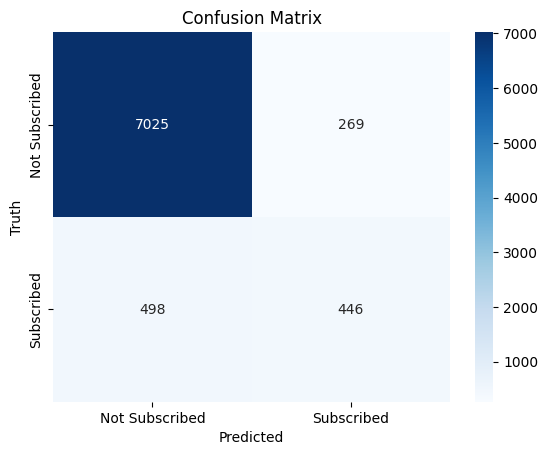

In [ ]:
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Subscribed", "Subscribed"], yticklabels=["Not Subscribed", "Subscribed"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

75-25 Ratio

In [ ]:
model = xgb.XGBClassifier()
model = model.fit(X_train2_nomulti, y_train2_nomulti)

In [ ]:
y_pred2 = model.predict(X_test2_nomulti)
print(y_pred2)

[0 0 0 ... 0 0 0]


In [ ]:
print(classification_report(y_test2_nomulti, y_pred2))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      9132
           1       0.62      0.47      0.54      1165

    accuracy                           0.91     10297
   macro avg       0.78      0.72      0.74     10297
weighted avg       0.90      0.91      0.90     10297



In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test2_nomulti, y_pred2))

Accuracy: 0.9075458871515976


In [ ]:
cm2 = confusion_matrix(y_test2_nomulti, y_pred2)
cm2

array([[8797,  335],
       [ 617,  548]])

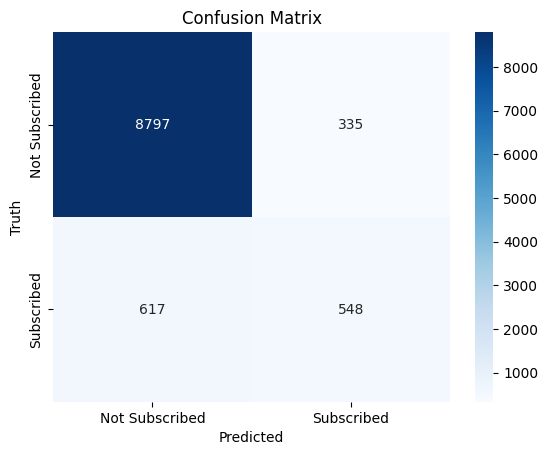

In [ ]:
sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Subscribed", "Subscribed"], yticklabels=["Not Subscribed", "Subscribed"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

70-30 Ratio

In [ ]:
model = xgb.XGBClassifier()
model = model.fit(X_train3_nomulti, y_train3_nomulti)

In [ ]:
y_pred3 = model.predict(X_test3_nomulti)
print(y_pred3)

[0 0 0 ... 0 0 0]


In [ ]:
print(classification_report(y_test3_nomulti, y_pred3))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     10944
           1       0.62      0.47      0.54      1413

    accuracy                           0.91     12357
   macro avg       0.78      0.72      0.74     12357
weighted avg       0.90      0.91      0.90     12357



In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test3_nomulti, y_pred3))

Accuracy: 0.907016266084001


In [ ]:
cm3 = confusion_matrix(y_test3_nomulti, y_pred3)
cm3

array([[10539,   405],
       [  744,   669]])

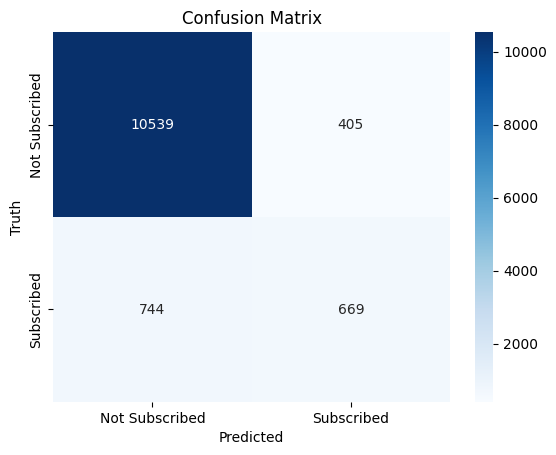

In [ ]:
sns.heatmap(cm3, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Subscribed", "Subscribed"], yticklabels=["Not Subscribed", "Subscribed"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

60-40 Ratio

In [ ]:
model = xgb.XGBClassifier()
model = model.fit(X_train4_nomulti, y_train4_nomulti)

In [ ]:
y_pred4 = model.predict(X_test4_nomulti)
print(y_pred4)

[0 0 0 ... 0 1 0]


In [ ]:
print(classification_report(y_test4_nomulti, y_pred4))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     14601
           1       0.62      0.49      0.54      1875

    accuracy                           0.91     16476
   macro avg       0.78      0.72      0.75     16476
weighted avg       0.90      0.91      0.90     16476



In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test4_nomulti, y_pred4))

Accuracy: 0.9071376547705754


In [ ]:
cm4 = confusion_matrix(y_test4_nomulti, y_pred4)
cm4

array([[14033,   568],
       [  962,   913]])

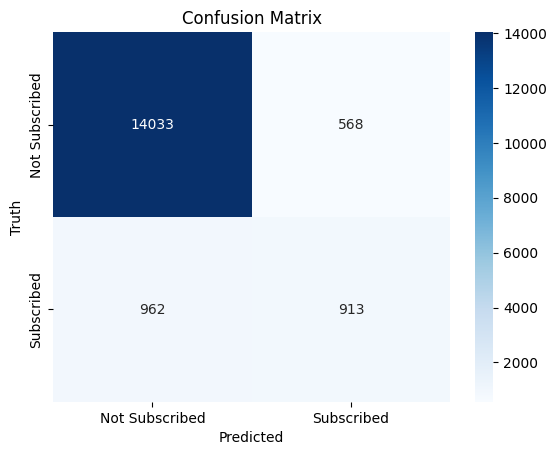

In [ ]:
sns.heatmap(cm4, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Subscribed", "Subscribed"], yticklabels=["Not Subscribed", "Subscribed"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

50-50 Ratio

In [ ]:
model = xgb.XGBClassifier()
model = model.fit(X_train5_nomulti, y_train5_nomulti)

In [ ]:
y_pred5 = model.predict(X_test5_nomulti)
print(y_pred5)

[0 0 0 ... 0 0 0]


In [ ]:
print(classification_report(y_test5_nomulti, y_pred5))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     18242
           1       0.62      0.47      0.54      2352

    accuracy                           0.91     20594
   macro avg       0.78      0.72      0.74     20594
weighted avg       0.90      0.91      0.90     20594



In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test5_nomulti, y_pred5))

Accuracy: 0.9064290570068952


In [ ]:
cm5 = confusion_matrix(y_test5_nomulti, y_pred5)
cm5

array([[17557,   685],
       [ 1242,  1110]])

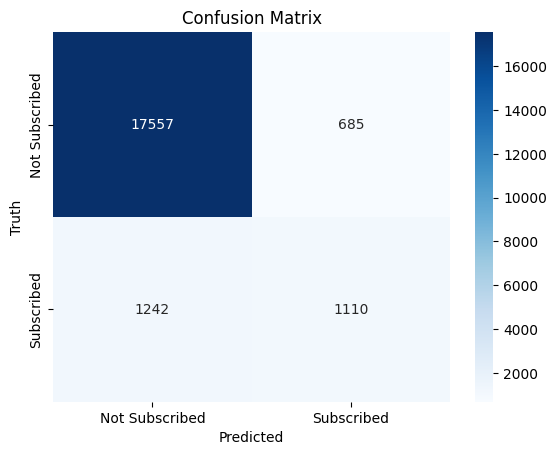

In [ ]:
sns.heatmap(cm5, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Subscribed", "Subscribed"], yticklabels=["Not Subscribed", "Subscribed"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

ADA Boosting after VIF

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

80-20 Ratio

In [ ]:
model = AdaBoostClassifier(n_estimators=50, random_state=42)
model.fit(X_train1_nomulti, y_train1_nomulti)

AdaBoostClassifier(random_state=42)

In [ ]:
y_pred1 = model.predict(X_test1_nomulti)
print(y_pred1)

[0 0 0 ... 0 0 0]


In [ ]:
accuracy = accuracy_score(y_test1_nomulti, y_pred1)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test1_nomulti, y_pred1))

Accuracy: 0.90
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7294
           1       0.62      0.38      0.47       944

    accuracy                           0.90      8238
   macro avg       0.77      0.67      0.71      8238
weighted avg       0.89      0.90      0.89      8238



In [ ]:
cm1 = confusion_matrix(y_test1_nomulti, y_pred1)
cm1

array([[7079,  215],
       [ 590,  354]])

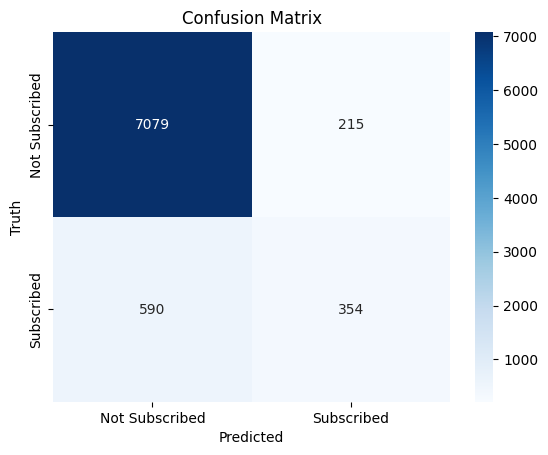

In [ ]:
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Subscribed", "Subscribed"], yticklabels=["Not Subscribed", "Subscribed"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

75-25 Ratio

In [ ]:
model = AdaBoostClassifier(n_estimators=50, random_state=42)
model.fit(X_train2_nomulti, y_train2_nomulti)

AdaBoostClassifier(random_state=42)

In [ ]:
y_pred2 = model.predict(X_test2_nomulti)
print(y_pred2)

[0 0 0 ... 0 0 0]


In [ ]:
accuracy = accuracy_score(y_test2_nomulti, y_pred2)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test2_nomulti, y_pred2))

Accuracy: 0.90
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      9132
           1       0.64      0.36      0.46      1165

    accuracy                           0.90     10297
   macro avg       0.78      0.67      0.70     10297
weighted avg       0.89      0.90      0.89     10297



In [ ]:
cm2 = confusion_matrix(y_test2_nomulti, y_pred2)
cm2

array([[8893,  239],
       [ 745,  420]])

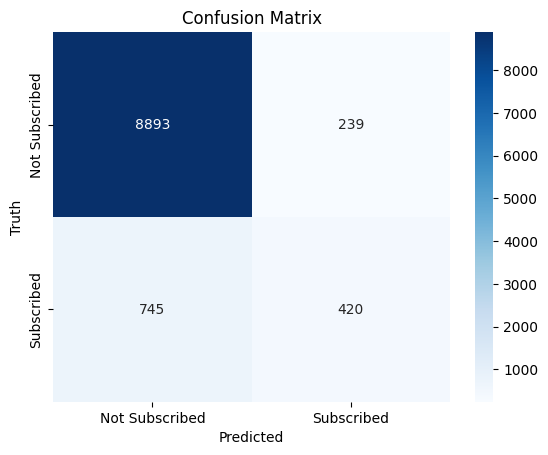

In [ ]:
sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Subscribed", "Subscribed"], yticklabels=["Not Subscribed", "Subscribed"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

70-30 Ratio

In [ ]:
model = AdaBoostClassifier(n_estimators=50, random_state=42)
model.fit(X_train3_nomulti, y_train3_nomulti)

AdaBoostClassifier(random_state=42)

In [ ]:
y_pred3 = model.predict(X_test3_nomulti)
print(y_pred3)

[0 0 0 ... 0 0 0]


In [ ]:
accuracy = accuracy_score(y_test3_nomulti, y_pred3)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test3_nomulti, y_pred3))

Accuracy: 0.90
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     10944
           1       0.63      0.35      0.45      1413

    accuracy                           0.90     12357
   macro avg       0.78      0.66      0.70     12357
weighted avg       0.89      0.90      0.89     12357



In [ ]:
cm3 = confusion_matrix(y_test3_nomulti, y_pred3)
cm3

array([[10657,   287],
       [  920,   493]])

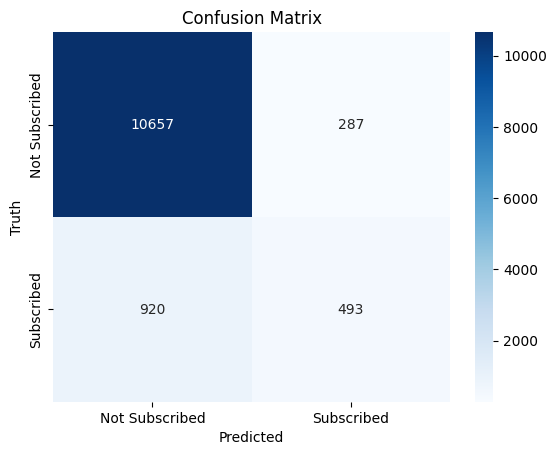

In [ ]:
sns.heatmap(cm3, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Subscribed", "Subscribed"], yticklabels=["Not Subscribed", "Subscribed"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

60-40 Ratio

In [ ]:
model = AdaBoostClassifier(n_estimators=50, random_state=42)
model.fit(X_train4_nomulti, y_train4_nomulti)

AdaBoostClassifier(random_state=42)

In [ ]:
y_pred4 = model.predict(X_test4_nomulti)
print(y_pred4)

[0 0 0 ... 0 1 0]


In [ ]:
accuracy = accuracy_score(y_test4_nomulti, y_pred4)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test4_nomulti, y_pred4))

Accuracy: 0.90
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     14601
           1       0.62      0.35      0.45      1875

    accuracy                           0.90     16476
   macro avg       0.77      0.66      0.70     16476
weighted avg       0.89      0.90      0.89     16476



In [ ]:
cm4 = confusion_matrix(y_test4_nomulti, y_pred4)
cm4

array([[14207,   394],
       [ 1221,   654]])

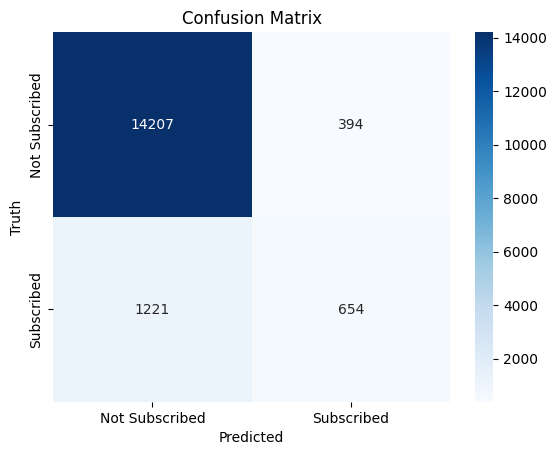

In [ ]:
sns.heatmap(cm4, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Subscribed", "Subscribed"], yticklabels=["Not Subscribed", "Subscribed"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

50-50 Ratio

In [ ]:
model = AdaBoostClassifier(n_estimators=50, random_state=42)
model.fit(X_train5_nomulti, y_train5_nomulti)

AdaBoostClassifier(random_state=42)

In [ ]:
y_pred5 = model.predict(X_test5_nomulti)
print(y_pred5)

[0 0 0 ... 0 0 1]


In [ ]:
accuracy = accuracy_score(y_test5_nomulti, y_pred5)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test5_nomulti, y_pred5))

Accuracy: 0.90
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     18242
           1       0.64      0.33      0.44      2352

    accuracy                           0.90     20594
   macro avg       0.78      0.65      0.69     20594
weighted avg       0.89      0.90      0.89     20594



In [ ]:
cm5 = confusion_matrix(y_test5_nomulti, y_pred5)
cm5

array([[17795,   447],
       [ 1572,   780]])

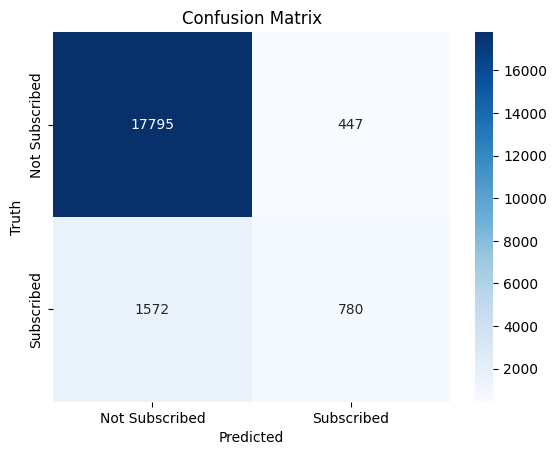

In [ ]:
sns.heatmap(cm5, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Subscribed", "Subscribed"], yticklabels=["Not Subscribed", "Subscribed"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

Artificial Neural Network before VIF

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

80-20 Ratio

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10, activation='relu'),
                            tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP1: Fit the model

history= model.fit(X_train1, y_train1, epochs= 100)

Epoch 1/100
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - a=recall: 0.3540 - accuracy: 0.8621 - loss: 2.3783 - precision: 0.4007
Epoch 2/100
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - a=recall: 0.3698 - accuracy: 0.8786 - loss: 0.4788 - precision: 0.4539
Epoch 3/100
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - a=recall: 0.3939 - accuracy: 0.8824 - loss: 0.4409 - precision: 0.4736
Epoch 4/100
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - a=recall: 0.3941 - accuracy: 0.8809 - loss: 0.4096 - precision: 0.4664
Epoch 5/100
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - a=recall: 0.4167 - accuracy: 0.8880 - loss: 0.3741 - precision: 0.5042
Epoch 6/100
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - a=recall: 0.4165 - accuracy: 0.8878 - loss: 0.3569 - precision: 0.5024
Epoch 7/100
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - a=recall: 0.4171 - accuracy: 0.8892 - loss: 0.3506 - precision: 0.5116
Epoch 8/100
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - a=recall: 0.4236 - accuracy: 0.8914 - loss: 0.3

<Axes: >

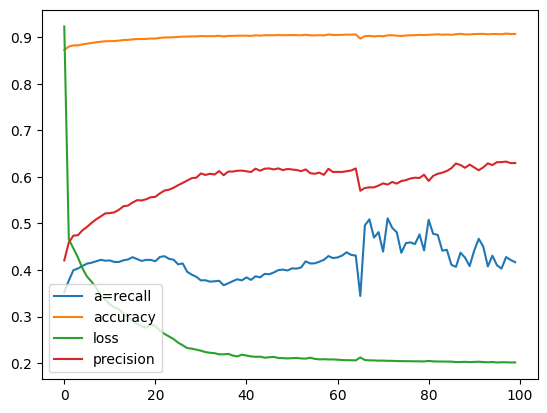

In [ ]:
pd.DataFrame(history.history).plot()

75-25 Ratio

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10, activation='relu'),
                            tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP1: Fit the model

history= model.fit(X_train2, y_train2, epochs= 100)

Epoch 1/100
966/966 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - a=recall: 0.2109 - accuracy: 0.8765 - loss: 2.1104 - precision: 0.3971
Epoch 2/100
966/966 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - a=recall: 0.3589 - accuracy: 0.9000 - loss: 0.2970 - precision: 0.5883
Epoch 3/100
966/966 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - a=recall: 0.3648 - accuracy: 0.8998 - loss: 0.2839 - precision: 0.5864
Epoch 4/100
966/966 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - a=recall: 0.3691 - accuracy: 0.8986 - loss: 0.2644 - precision: 0.5753
Epoch 5/100
966/966 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - a=recall: 0.3672 - accuracy: 0.9010 - loss: 0.2409 - precision: 0.5952
Epoch 6/100
966/966 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - a=recall: 0.3741 - accuracy: 0.9029 - loss: 0.2269 - precision: 0.6081
Epoch 7/100
966/966 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - a=recall: 0.4093 - accuracy: 0.9032 - loss: 0.2202 - precision: 0.5997
Epoch 8/100
966/966 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - a=recall: 0.4800 - accuracy: 0.9028 - loss: 0.2163 - precision:

<Axes: >

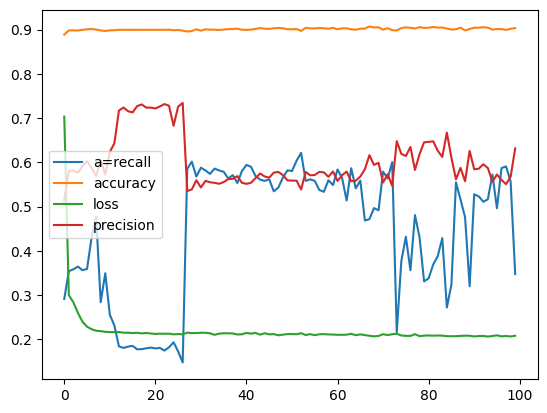

In [ ]:
pd.DataFrame(history.history).plot()

70-30 Ratio

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10, activation='relu'),
                            tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP1: Fit the model

history= model.fit(X_train3, y_train3, epochs= 100)

Epoch 1/100
901/901 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - a=recall: 0.2016 - accuracy: 0.8420 - loss: 7.2719 - precision: 0.3427
Epoch 2/100
901/901 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - a=recall: 0.1004 - accuracy: 0.8900 - loss: 0.4467 - precision: 0.5385
Epoch 3/100
901/901 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - a=recall: 0.1869 - accuracy: 0.8966 - loss: 0.3610 - precision: 0.6299
Epoch 4/100
901/901 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - a=recall: 0.1542 - accuracy: 0.8939 - loss: 0.3398 - precision: 0.5984
Epoch 5/100
901/901 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - a=recall: 0.1848 - accuracy: 0.8965 - loss: 0.3240 - precision: 0.6277
Epoch 6/100
901/901 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - a=recall: 0.1901 - accuracy: 0.8975 - loss: 0.3214 - precision: 0.6430
Epoch 7/100
901/901 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - a=recall: 0.1679 - accuracy: 0.8958 - loss: 0.3220 - precision: 0.6268
Epoch 8/100
901/901 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - a=recall: 0.1667 - accuracy: 0.8966 - loss: 0.3249 - precision:

<Axes: >

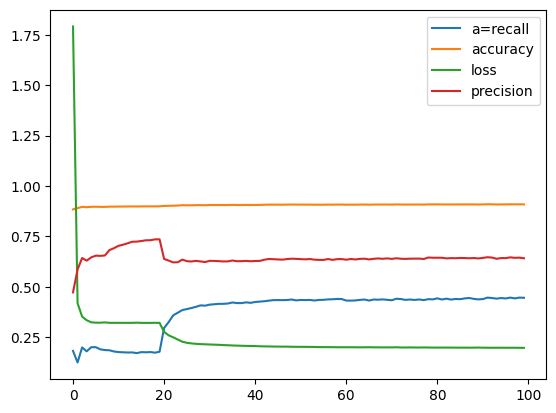

In [ ]:
pd.DataFrame(history.history).plot()

60-40 Ratio

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10, activation='relu'),
                            tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP1: Fit the model

history= model.fit(X_train4, y_train4, epochs= 100)

Epoch 1/100
773/773 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - a=recall: 0.2262 - accuracy: 0.8955 - loss: 1.8502 - precision: 0.5178
Epoch 2/100
773/773 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - a=recall: 0.4266 - accuracy: 0.9068 - loss: 0.2474 - precision: 0.6135
Epoch 3/100
773/773 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - a=recall: 0.4265 - accuracy: 0.9076 - loss: 0.2425 - precision: 0.6179
Epoch 4/100
773/773 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - a=recall: 0.4357 - accuracy: 0.9073 - loss: 0.2375 - precision: 0.6118
Epoch 5/100
773/773 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - a=recall: 0.4557 - accuracy: 0.9081 - loss: 0.2320 - precision: 0.6143
Epoch 6/100
773/773 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - a=recall: 0.4677 - accuracy: 0.9085 - loss: 0.2265 - precision: 0.6135
Epoch 7/100
773/773 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - a=recall: 0.4739 - accuracy: 0.9080 - loss: 0.2227 - precision: 0.6087
Epoch 8/100
773/773 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - a=recall: 0.4818 - accuracy: 0.9088 - loss: 0.2188 - precision:

In [ ]:
pd.DataFrame(history.history).plot()

50-50 Ratio

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10, activation='relu'),
                            tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP1: Fit the model

history= model.fit(X_train5, y_train5, epochs= 100)

In [ ]:
pd.DataFrame(history.history).plot()

Artificial Neural Network after VIF

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

80-20 Ratio

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10, activation='relu'),
                            tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP1: Fit the model

history= model.fit(X_train1_nomulti, y_train1_nomulti, epochs= 100)

Epoch 1/100
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - a=recall: 0.2465 - accuracy: 0.6957 - loss: 5.5853 - precision: 0.1116
Epoch 2/100
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - a=recall: 0.0000e+00 - accuracy: 0.8875 - loss: 0.2474 - precision: 0.0000e+00
Epoch 3/100
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - a=recall: 0.0000e+00 - accuracy: 0.8875 - loss: 0.2404 - precision: 0.0000e+00
Epoch 4/100
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - a=recall: 0.0000e+00 - accuracy: 0.8875 - loss: 0.2321 - precision: 0.0000e+00
Epoch 5/100
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - a=recall: 0.0000e+00 - accuracy: 0.8875 - loss: 0.2308 - precision: 0.0000e+00
Epoch 6/100
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - a=recall: 0.0000e+00 - accuracy: 0.8875 - loss: 0.2288 - precision: 0.0000e+00
Epoch 7/100
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - a=recall: 0.0000e+00 - accuracy: 0.8875 - loss: 0.2267 - precision: 0.0000e+00
Epoch 8/100
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step -

<Axes: >

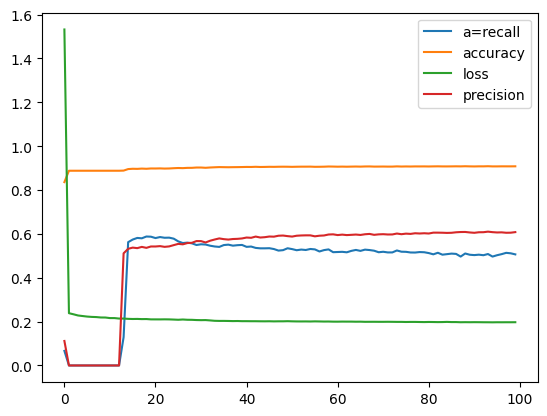

In [ ]:
pd.DataFrame(history.history).plot()

75-25 Ratio

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10, activation='relu'),
                            tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP1: Fit the model

history= model.fit(X_train2_nomulti, y_train2_nomulti, epochs= 100)

In [ ]:
pd.DataFrame(history.history).plot()

70-30 Ratio

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10, activation='relu'),
                            tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP1: Fit the model

history= model.fit(X_train3_nomulti, y_train3_nomulti, epochs= 100)

In [ ]:
pd.DataFrame(history.history).plot()

60-40 Ratio

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10, activation='relu'),
                            tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP1: Fit the model

history= model.fit(X_train4_nomulti, y_train4_nomulti, epochs= 100)

In [ ]:
pd.DataFrame(history.history).plot()

50-50 Ratio

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10, activation='relu'),
                            tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP1: Fit the model

history= model.fit(X_train5_nomulti, y_train5_nomulti, epochs= 100)

In [ ]:
pd.DataFrame(history.history).plot()